In [1]:
import tarfile
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib as mpl
import sys
mpl.rcParams['figure.figsize'] = (20,11)
from uuid import uuid4
import networkx as nx 
from tqdm.notebook import tqdm
tqdm.pandas()
from IPython.display import clear_output
import re
from io import StringIO
import zipfile
import pickle
sns.set_context('poster')
import numpy as np
from tqdm.keras import TqdmCallback
import tensorflow as tf
from VDeepJUnbondedDataset import VDeepJUnbondedDataset
from VDeepJMOracleModel import VDeepJMOracleAllign
from VDeepJModel import ModelComponents
from VDeepJDataset import VDeepJDataset
from Trainer import Trainer
from VDeepJModel import VDeepJAllign
from UnboundedTrainer import UnboundedTrainer
from itertools import islice
import csv

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:

# Importing the library
import psutil
def ram_usage():
    # Getting % usage of virtual_memory ( 3rd field)
    print('RAM memory % used:', psutil.virtual_memory()[2])
    # Getting usage of virtual_memory in GB ( 4th field)
    print('RAM Used (GB):', psutil.virtual_memory()[3]/1000000000)



In [3]:
ubd = VDeepJUnbondedDataset(nucleotide_add_coef=110)

In [4]:
g = ubd.generate_single()
g.mutated_seq

'GAGGTACAGCTGGTGGAGTCTGANGGAGGCTTGGTCCAGCCGGGGGGGTCCCTGCGACTCTCCCGTGTAGCCTCGNGATTCCTCGTCACAGCCGGTTACANGANCTGGGTCCGCCGGACTCCAGGAAAGGGGCTGGAGTGGGTCTCACTGCTTTACTCTGATCANAATACACTTCACCCAGACTCGATGAAGGGCCGCTTCACCATTTCCCGAGACTACTTCCCCAGTACTGTGTATCTTCACNTGAGTACTCTCAGAAATGAAGACACGGCTGTCTATTATTGTGNTATTTCGGTTGGCTGTACCTTCCACCGCGTTACGGTAACCATAAGGCACCTACAACATTGGGGCCAGGGCATCGTGGTCACCGTCTCATCAG'

In [5]:
for i in ubd.get_train_dataset().as_numpy_iterator():
    x,y = list(i)
    print(512-sum(map(lambda x: x == 0, x['tokenized_sequence'][0])))
    break

379


In [2]:
from VDeepJModelExperimental import VDeepJAllignExperimental

In [4]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
Reduce_lr = ReduceLROnPlateau(monitor='v_allele_categorical_accuracy', factor=0.8,
                              patience=1,min_delta=1e-32,mode='auto')

In [6]:
# trainer = UnboundedTrainer(  VDeepJAllignExperimental,epochs=5,batch_size=64,steps_per_epoch=1_000_000,verbose=1,
#                              corrupt_beginning=True,
#                              classification_head_metric='categorical_accuracy',
#                              interval_head_metric=tf.keras.losses.log_cosh,
#                              corrupt_proba=0.4,
#                              use_gene_masking=False,
#                              nucleotide_add_coef=110,
#                              nucleotide_remove_coef=110,
#                              random_sequence_add_proba=0.45,
#                              single_base_stream_proba=0.05,
#                              duplicate_leading_proba=0.25,
#                              random_allele_proba=0.25,
#                              num_parallel_calls = 45,
#                              log_to_file=True,log_file_name='log',log_file_path='C:/Users/Tomas/Downloads/',callbacks=[Reduce_lr],optimizers_params={'clipnorm' : 1}
#                              )

In [2]:
from VDeepJUnbondedDataset import VDeepJUnbondedDatasetSingleBeam
from VDeepJModelExperimental import VDeepJAllignExperimentalSingleBeam,VDeepJAllignExperimentalSingleBeam2
from UnboundedTrainer import SingleBeamUnboundedTrainer
ds = VDeepJUnbondedDatasetSingleBeam(nucleotide_add_coef=210,nucleotide_remove_coef=510)
import random
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='v_allele_categorical_accuracy', factor=0.8,
                              patience=1,min_delta=1e-32,mode='auto')

In [74]:
trainer = SingleBeamUnboundedTrainer(
    VDeepJAllignExperimentalSingleBeam2,
    epochs=1,
    batch_size=32,
    steps_per_epoch=150_000,
    verbose=1,
    corrupt_beginning=True,
    classification_head_metric=[tf.keras.metrics.AUC(),tf.keras.metrics.AUC(),tf.keras.metrics.AUC()],
    interval_head_metric=tf.keras.losses.mae,
    corrupt_proba=1,
    nucleotide_add_coef=210,
    nucleotide_remove_coef=330,
    random_sequence_add_proba=0.45,
    single_base_stream_proba=0.05,
    duplicate_leading_proba=0.25,
    random_allele_proba=0.25,
    num_parallel_calls=45,
    log_to_file=True,
    optimizers_params={"clipnorm": 1},
)

In [75]:
train_ds = trainer.train_dataset.get_train_dataset().prefetch(buffer_size=32)

<AxesSubplot:ylabel='Density'>

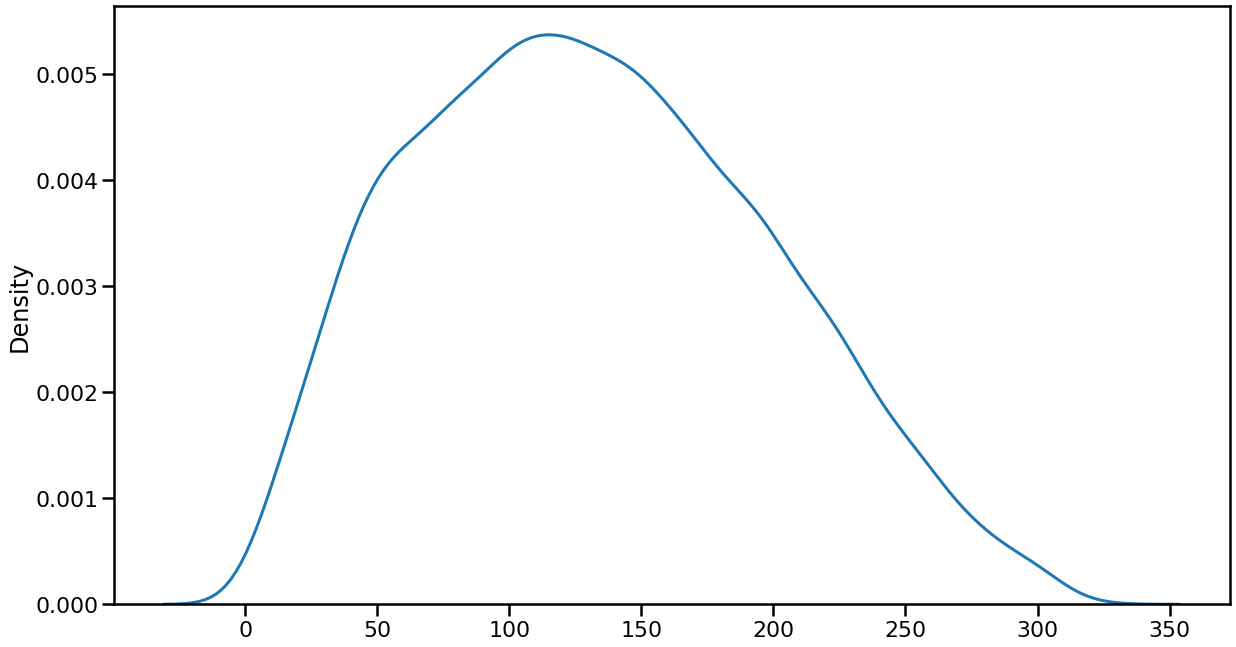

In [76]:
sns.kdeplot(trainer.train_dataset.sequence_corruptor._sample_nucleotide_remove_distribution(10000))

In [77]:
train_dataset = trainer.train_dataset.get_train_dataset()
train_dataset = train_dataset.prefetch(buffer_size=16)

def preprocess_data(*args):
    return args
train_ds = train_dataset.map(
    preprocess_data,
    num_parallel_calls=8
)

In [78]:
v_length = []
v_start = []
v_end = []
r = tqdm(train_ds)
for i in r:
    Vl = (i[1]['v_end']-i[1]['v_start'])
    v_length+= list(Vl.numpy())
    v_start+= list(i[1]['v_start'].numpy())
    v_end+= list(i[1]['v_end'].numpy())

    r.set_postfix({'N':len(v_length)})
    if len(v_length) > 30_000:
        break

0it [00:00, ?it/s]

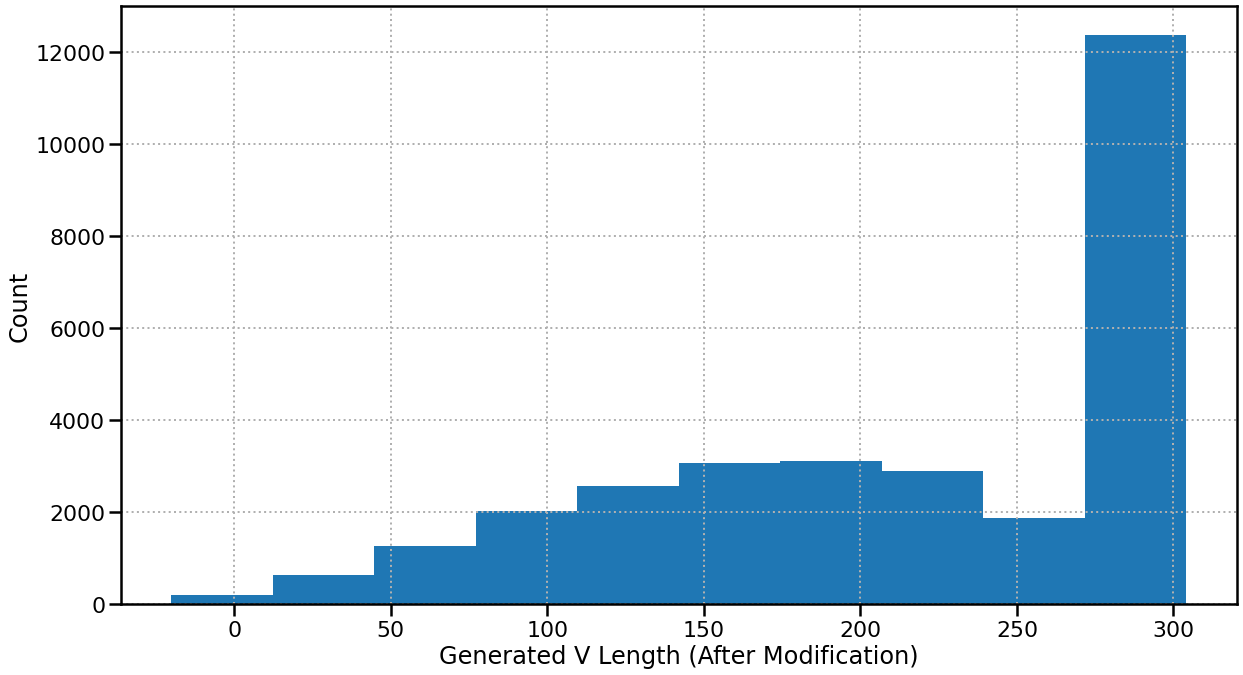

In [79]:
plt.hist(v_length)
plt.xlabel('Generated V Length (After Modification)')
plt.ylabel('Count')
plt.grid(lw=2,ls=':')

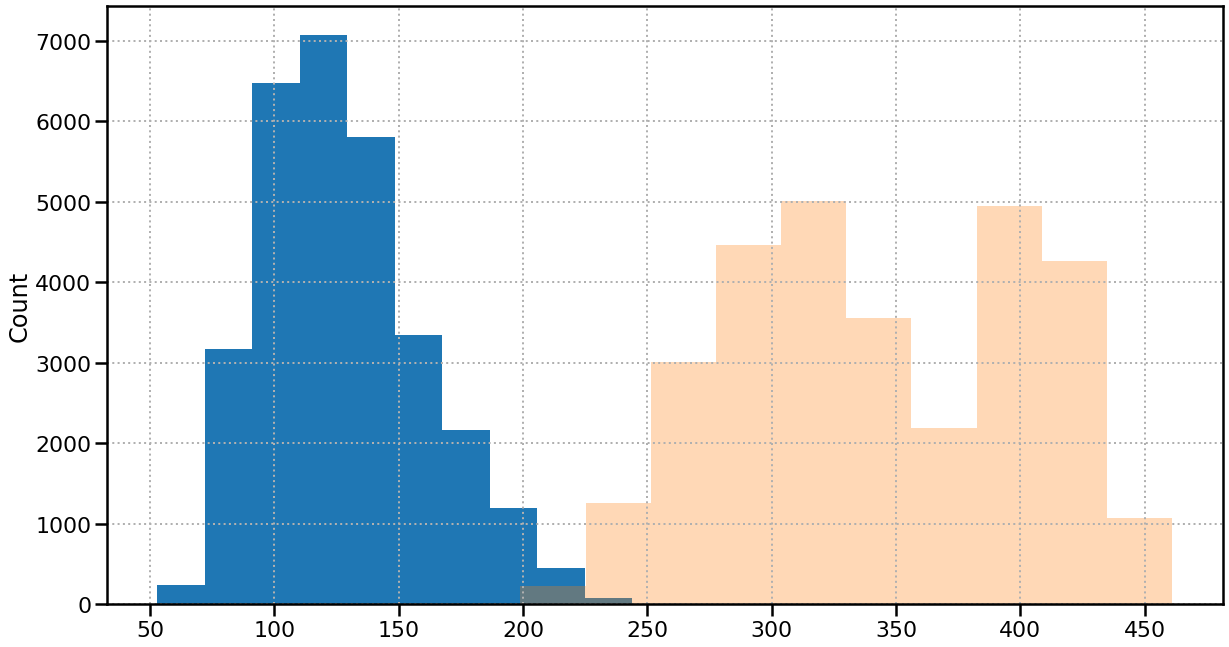

In [81]:
plt.hist(v_start)
plt.hist(v_end,alpha=0.3)
#plt.xlabel('Generated V Length (After Modification)')
plt.ylabel('Count')
plt.grid(lw=2,ls=':')

In [7]:
ds = VDeepJUnbondedDatasetSingleBeam(nucleotide_add_coef=210,nucleotide_remove_coef=310,corrupt_proba=1,
                             random_sequence_add_proba=0.45,
                             single_base_stream_proba=0.05,
                             duplicate_leading_proba=0.25,
                             random_allele_proba=0.25)


In [4]:
s = [ds.sequence_corruptor._sample_add_remove_distribution().item()  for i in range(2000)]
pd.Series(s).value_counts()

1    825
2    770
3    405
dtype: int64

In [21]:
seq_len = []
removed = []
amount = []
pstart = []
pend = []
v_start = []
j_end=[]
v_end=[]
d_start = []
d_end = []
j_start = []
total_len = []
seqs = []
mut_seqs = []
padded_seqs = []
for i in range(10):
    seq = ds.generate_single()
    seq_len.append(seq.v_seq_end-seq.v_seq_start)
    total_len.append(len(seq.mutated_seq))
    ms,action,amount_changed = ds.sequence_corruptor._corrupt_sequence_beginning(seq.mutated_seq)
    seqs.append(seq.mutated_seq)
    mut_seqs.append(ms)
    padded_array, start, end = ds.sequence_corruptor._process_and_dpad(ms, ds.sequence_corruptor.max_length)
    padded_seqs.append(padded_array)
    removed.append(action)
    amount.append(amount_changed)
    pstart.append(start)
    pend.append(end)
    
    O_row = pd.Series({'v_sequence_start':seq.v_seq_start,'v_sequence_end':seq.v_seq_end,'d_sequence_start':seq.d_seq_start,'d_sequence_end':seq.d_seq_end,'j_sequence_start':seq.j_seq_start,'j_sequence_end':seq.j_seq_end})
    
    adjusted_v_start = None
    adjusted_v_end = None
    adjusted_d_start = None
    adjusted_d_end = None
    adjusted_j_start = None
    adjusted_j_end = None
    row = pd.Series({'v_sequence_start':seq.v_seq_start,'v_sequence_end':seq.v_seq_end,'d_sequence_start':seq.d_seq_start,'d_sequence_end':seq.d_seq_end,'j_sequence_start':seq.j_seq_start,'j_sequence_end':seq.j_seq_end})
    if action == 1:  # remove only
        amount_removed = amount_changed
        adjusted_v_start = 0
        adjusted_v_end = row.v_sequence_end - amount_removed
        adjusted_d_start = row.d_sequence_start - amount_removed
        adjusted_d_end = row.d_sequence_end - amount_removed
        adjusted_j_start = row.j_sequence_start - amount_removed
        adjusted_j_end = row.j_sequence_end - amount_removed

    elif action == 2:  # add only:
        amount_added = amount_changed
        adjusted_v_start = amount_added
        adjusted_v_end = row.v_sequence_end + amount_added
        adjusted_d_start = row.d_sequence_start + amount_added
        adjusted_d_end = row.d_sequence_end + amount_added
        adjusted_j_start = row.j_sequence_start + amount_added
        adjusted_j_end = row.j_sequence_end + amount_added

    elif action == 3:  # remove and add
        amount_added, amount_removed = amount_changed

        adjusted_v_start = 0
        adjusted_v_end = row.v_sequence_end - amount_removed
        adjusted_d_start = row.d_sequence_start - amount_removed
        adjusted_d_end = row.d_sequence_end - amount_removed
        adjusted_j_start = row.j_sequence_start - amount_removed
        adjusted_j_end = row.j_sequence_end - amount_removed

        adjusted_v_start = adjusted_v_start + amount_added
        adjusted_v_end = adjusted_v_end + amount_added
        adjusted_d_start = adjusted_d_start + amount_added
        adjusted_d_end = adjusted_d_end + amount_added
        adjusted_j_start = adjusted_j_start + amount_added
        adjusted_j_end = adjusted_j_end + amount_added


    padded_array, start, end = ds.sequence_corruptor._process_and_dpad(ms, ds.sequence_corruptor.max_length)
    pad_size = start
    padded_seqs.append(padded_array)

    adjusted_v_start+=pad_size
    adjusted_v_end+=pad_size
    adjusted_d_start+=pad_size
    adjusted_d_end+=pad_size
    adjusted_j_start+=pad_size
    adjusted_j_end+=pad_size

    v_start.append((O_row['v_sequence_start'],adjusted_v_start))
    v_end.append((O_row['v_sequence_end'],adjusted_v_end))
    d_start.append((O_row['d_sequence_start'],adjusted_d_start))
    d_end.append((O_row['d_sequence_end'],adjusted_d_end))
    j_start.append((O_row['j_sequence_start'],adjusted_j_start))
    j_end.append((O_row['j_sequence_end'],adjusted_j_end))

In [24]:
row

v_sequence_start      1
v_sequence_end      296
d_sequence_start    303
d_sequence_end      306
j_sequence_start    308
j_sequence_end      352
dtype: int64

In [22]:
np.array(padded_seqs[2])[156:267]

array([3, 2, 2, 1, 4, 2, 4, 4, 1, 2, 4, 1, 3, 4, 1, 3, 2, 3, 1, 2, 2, 1,
       4, 2, 1, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3, 1, 2, 4, 4, 3, 3, 4, 1, 3,
       4, 4, 4, 4, 4, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 4, 2, 5, 3, 1, 3, 2,
       3, 3, 1, 2, 2, 3, 3, 3, 1, 4, 2, 1, 2, 4, 2, 1, 2, 4, 1, 2, 1, 3,
       2, 3, 3, 3, 1, 3, 4, 1, 4, 4, 2, 1, 4, 2, 1, 4, 1, 1, 4, 4, 4, 3,
       2])

In [23]:
rdf = pd.DataFrame({'orginal_full_len':total_len,'original_length':seq_len,'action':removed,'amount':amount,'padded_start':pstart,'padded_end':pend,
                   'padded_v_start':v_start,'padded_v_end':v_end,'padded_d_start':d_start,'padded_d_end':d_end,'padded_j_start':j_start,'padded_j_end':j_end})

rdf.action = rdf.action.map({1:'removed',2:'added',3:'added_removed'})
rdf['pad_size'] = (512-rdf.orginal_full_len)//2
rdf

,orginal_full_len,original_length,action,amount,padded_start,padded_end,padded_v_start,padded_v_end,padded_d_start,padded_d_end,padded_j_start,padded_j_end,pad_size
0,373,293,removed,21,80,431,"(1, 80)","(294, 353)","(306, 365)","(316, 375)","(328, 387)","(373, 432)",69
1,358,291,added,6,74,437,"(1, 80)","(292, 372)","(305, 385)","(313, 393)","(314, 394)","(358, 438)",77
2,376,290,added,99,19,494,"(1, 118)","(291, 409)","(314, 432)","(327, 445)","(329, 447)","(376, 494)",68
3,367,292,removed,164,155,358,"(1, 155)","(293, 284)","(301, 292)","(312, 303)","(315, 306)","(367, 358)",72
4,376,292,removed,19,78,435,"(1, 78)","(293, 352)","(309, 368)","(333, 392)","(339, 398)","(376, 435)",68
5,388,295,added_removed,"(10, 139)",127,386,"(1, 137)","(296, 294)","(309, 307)","(337, 335)","(339, 337)","(388, 386)",62
6,349,288,added_removed,"(6, 77)",117,394,"(1, 123)","(289, 335)","(297, 343)","(304, 350)","(309, 355)","(349, 395)",81
7,385,295,added_removed,"(6, 193)",157,354,"(1, 163)","(296, 266)","(305, 275)","(328, 298)","(334, 304)","(385, 355)",63
8,370,295,removed,129,136,377,"(1, 136)","(296, 303)","(301, 308)","(311, 318)","(319, 326)","(370, 377)",71
9,352,295,removed,169,165,348,"(1, 165)","(296, 292)","(303, 299)","(306, 302)","(308, 304)","(352, 348)",80


In [206]:
128*1171

149888

In [49]:
gseq = ds.generate_single()

original_v_start = gseq.v_seq_start
original_v_end = gseq.v_seq_end
original_d_start = gseq.d_seq_start
original_d_end = gseq.d_seq_end
original_j_start = gseq.j_seq_start
original_j_end = gseq.j_seq_end

seq, was_removed, amount_changed = ds.sequence_corruptor._corrupt_sequence_beginning(
    gseq.mutated_seq
)


padded_array, start, end = ds.sequence_corruptor._process_and_dpad(seq, ds.sequence_corruptor.max_length)
#padded_sequences.append(padded_array)
#PPPPPP_S_XXXXXXX_OS_GGGGGGG

to_corrupt = 1
if to_corrupt:
    if was_removed:
        # v is shorter
        _adjust = start-amount_changed
    else:
        # v is longer
        _adjust = start + amount_changed
        start += amount_changed
else:
    _adjust = start

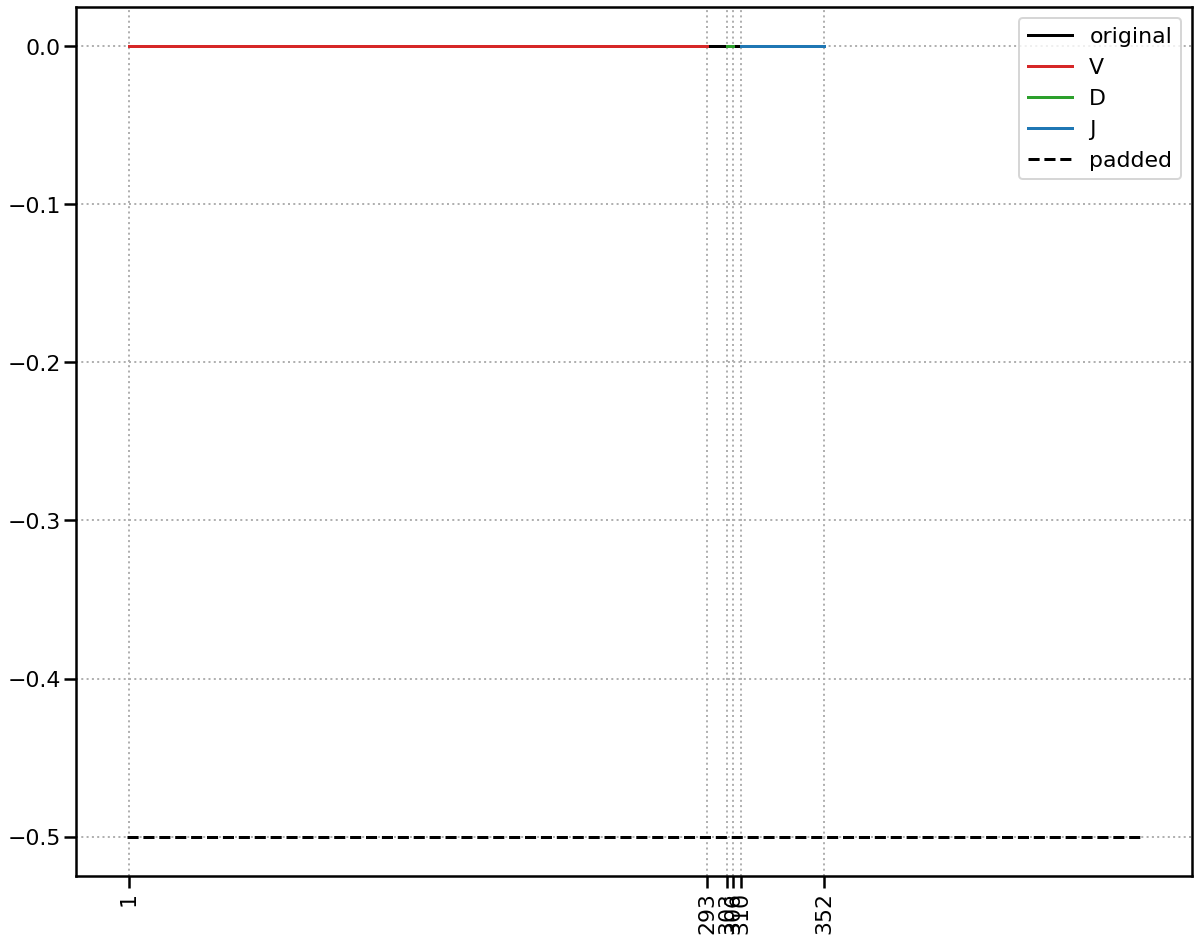

In [68]:
plt.figure(figsize=(20,16))

# original
plt.plot([original_v_start,original_j_end],[0,0],color='black',label='original')
plt.plot([original_v_start,original_v_end],[0,0],color='tab:red',label='V')
plt.plot([original_d_start,original_d_end],[0,0],color='tab:green',label='D')
plt.plot([original_j_start,original_j_end],[0,0],color='tab:blue',label='J')
#PADDED
plt.plot([0,512],[-0.5,-0.5],color='black',label='padded',ls='--')
#plt.plot([original_v_start,original_v_end],[0,0],color='tab:red',label='V')
#plt.plot([original_d_start,original_d_end],[0,0],color='tab:green',label='D')
#plt.plot([original_j_start,original_j_end],[0,0],color='tab:blue',label='J')

plt.xticks([original_v_start,original_v_end,original_d_start,original_d_end,original_j_start,original_j_end],rotation=90)
plt.grid(lw=2,ls=':')
plt.legend()

In [10]:
train_ds = ds.get_train_dataset().prefetch(16)

In [11]:
#trainer.train()

In [12]:
# train_ds = trainer.train_dataset.get_train_dataset()
# single_batch = train_ds.take(1)


In [13]:
#predicted = trainer.model.predict(single_batch)

In [14]:
#sns.histplot([ds.sequence_corruptor._sample_nucleotide_remove_distribution(1) for _ in range(10000)])

In [30]:
y['v_allele'].sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [117]:
allele_db = pd.read_csv('C:/Users/Tomas/Downloads/alleles_db.csv',index_col=2)

In [134]:
allele_db[allele_db['new_allele'] == 'IGHVF8-G45*06']

,new_allele,func_group,thresh,upper_range
imgt_allele,,,,
IGHV4-39*01_G315A,IGHVF8-G45*06,IGHVF8-G45,0.005,318


In [145]:
allele_db.loc['IGHV4-39*01_G315A',:]

new_allele     IGHVF8-G45*06
func_group        IGHVF8-G45
thresh                 0.005
upper_range              318
Name: IGHV4-39*01_G315A, dtype: object

In [146]:
from Bio import SeqIO
input_file = open("C:/Users/Tomas/Downloads/V-QUEST_IMGT_V-QUEST_reference_directory_Homo_sapiens_IG_IGHV.fasta.txt")
my_dict = SeqIO.to_dict(SeqIO.parse(input_file, "fasta"))
vquest = dict()
for key in my_dict:
    imgt_v = key.split('|')[1]
    if imgt_v not in allele_db.index:
        
        continue
        
    
    gapped_seq = str(my_dict[key].seq).upper()
    splited  = my_dict[key].description.split('|')
    
    
    aa = allele_db.loc[imgt_v,'new_allele']

    vquest[imgt_v] = {'sequence':gapped_seq,
                      'imgt_allele':aa,
                     'F':splited[3],
                     'pos':splited[5],
                     'ungapped_length':int(splited[6].split(' ')[0]),
                      'length_summary':splited[12]
                     }

In [152]:
# with open('E:/Immunobiology/AlignAIRR/vquest_allele_db.pkl','wb') as h:
#     pickle.dump(vquest,h)

vquest['IGHV4-39*01']

{'sequence': 'CAGCTGCAGCTGCAGGAGTCGGGCCCA...GGACTGGTGAAGCCTTCGGAGACCCTGTCCCTCACCTGCACTGTCTCTGGTGGCTCCATCAGC......AGTAGTAGTTACTACTGGGGCTGGATCCGCCAGCCCCCAGGGAAGGGGCTGGAGTGGATTGGGAGTATCTATTATAGT.........GGGAGCACCTACTACAACCCGTCCCTCAAG...AGTCGAGTCACCATATCCGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCAGACACGGCTGTGTATTACTGTGCGAGACA',
 'imgt_allele': 'IGHVF8-G45*07',
 'F': 'F',
 'pos': '11626..11924',
 'ungapped_length': 299,
 'length_summary': '299+21=320'}

In [7]:
def confidence_bound_search(pred, start=0, end=None, cb=0.95):
    if end is None:
        end = len(pred)

    if start > end:
        return end

    mid = (start + end) // 2
    sum_values = np.sum(pred[:mid])

    if sum_values >= cb and (mid == 1 or np.sum(pred[:mid-1]) < cb):
        return mid
    elif sum_values >= cb:
        return confidence_bound_search(pred, start, mid - 1, cb)
    else:
        return confidence_bound_search(pred, mid + 1, end, cb)
    
def confidence_bound(prediction,cb=0.95):
    ast = np.argsort(prediction)[::-1]
    return ast[:confidence_bound_search(prediction[ast],cb=cb)]


In [9]:
tf.__version__

'2.9.1'

In [8]:
t = np.array([0.1,0.4,0.3,0.1,0.1,0.1])
confidence_bound(t)

array([1, 2, 5, 4, 3], dtype=int64)

In [46]:
for ex,i in enumerate(trainer.model.layers):
    if type(i) == tf.keras.layers.Dense:
        if (np.max(i.weights[0])) != (np.max(i.weights[0])):
            print('Layer Index:',ex,'  Layer Name: ',i,i.name)
            print('Max Value at Layer Weights: ',np.max(i.weights[0]))
            print('=='*30)

Layer Index: 41   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931C6907F0> v_family_middle
Max Value at Layer Weights:  nan
Layer Index: 42   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931C690820> v_family
Max Value at Layer Weights:  nan
Layer Index: 44   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA561C0> v_gene_middle
Max Value at Layer Weights:  nan
Layer Index: 45   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA561F0> v_gene
Max Value at Layer Weights:  nan
Layer Index: 47   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA56B50> v_allele_middle
Max Value at Layer Weights:  nan
Layer Index: 48   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA56B80> v_allele
Max Value at Layer Weights:  nan
Layer Index: 50   Layer Name:  <keras.layers.core.dense.Dense object at 0x000001931CA5A520> v_gene_allele_distill
Max Value at Layer Weights:  nan


In [77]:
for ex,i in enumerate(trainer.model.layers):
    if len(i.weights) > 1:
        print(i.name,np.max(i.weights[0]),np.min(i.weights[0]),np.median(i.weights[0]))
        if np.max(i.weights[0]) != np.max(i.weights[0]):
            print(np.max(i.weights[0]))
            print(i.name)
            print(i)
            break

conv1d_and__batch_norm 1.6361611 -1.6818296 -0.0006089428
conv1d_and__batch_norm_1 1.3571036 -1.2683002 -0.01701276
conv1d_and__batch_norm_2 1.2821836 -1.3980745 -0.0033327243
conv1d_and__batch_norm_3 1.1993746 -1.0445809 -0.006815388
conv1d_and__batch_norm_4 nan nan nan
nan
conv1d_and__batch_norm_4


In [74]:
np.min(i.weights[0])

nan

In [10]:
precited = trainer.predict(r'E:\igor_generated_5M\test_set.tsv')

157/157 [==============================] - 3s 12ms/step


In [11]:
precited_pp = trainer.predict(r'E:\igor_generated_5M\test_set.tsv',raw=False,top_k=3)

157/157 [==============================] - 2s 12ms/step


In [12]:
np.argsort(np.array([0,5,2,7]))

array([0, 2, 1, 3], dtype=int64)

In [9]:
sn = trainer.save_model('C:/Users/Tomas/Downloads/test/')

Model Saved!
 Location: C:/Users/Tomas/Downloads/test/VDeepJModel_d25e4029-b0b0-4636-a4b4-3c339d120c28_weights


In [10]:
trainer.save_dataset_object('C:/Users/Tomas/Downloads/test/ds_object.ds')

Dataset Object Saved at C:/Users/Tomas/Downloads/test/ds_object.ds


In [12]:
lt = Trainer(VDeepJAllign,epochs=1,batch_size=64,verbose=1,
                 log_to_file=True,log_file_name='log',log_file_path='C:/Users/Tomas/Downloads/')

Keep in Mind no Dataset Was Loaded,
 Make Sure to Use "load_dataset" to Add a Train Dataset


In [13]:
lt.load_dataset_object('C:/Users/Tomas/Downloads/test/ds_object.ds')

In [14]:
#lt.load_dataset(r'E:\igor_generated_5M\test_set.tsv')
lt.rebuild_model()

In [15]:
lt.load_model(sn)

In [17]:
from VDeepJUnbondedDataset import global_genotype
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import AlignIO, SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline

def allign_sequences(seqs):
    sequences = [
    SeqRecord(Seq(seq), id=f"seq{en}")
    for en,seq in enumerate(seqs)
    ]
    SeqIO.write(sequences, r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\sequences.fasta", "fasta")

    # Define Clustal Omega command
    clustalomega_cline = ClustalOmegaCommandline(infile=r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\sequences.fasta",
                                                 outfile=r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\aligned.fasta", verbose=True, auto=True,force=True)
    clustalomega_cline.program_name = r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\clustalo.exe"
    stdout, stderr = clustalomega_cline()

    alignment = AlignIO.read(r"C:\Users\Tomas\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\aligned.fasta", "fasta")
    return alignment

In [61]:
V_Alleles = global_genotype()[0]['V']
V_Alleles = {i.name:i.ungapped_seq.upper() for i in V_Alleles}
#V_Alleles

In [215]:
import pickle
with open('E:/Immunobiology/AlignAIRR/V_Allele_F_dict.pkl','wb') as h:
    pickle.dump(V_Alleles,h)

In [205]:
allele_name = 'IGHVF5-G29*05'
allele = V_Alleles[allele_name]
allele = allele[250:]

#seqs = [allele]+list(V_Alleles.values())
#allingment = allign_sequences(seqs)

In [206]:
# adf = pd.DataFrame(data=[list(str(i.seq)) for i in allingment],index=['T']+list(V_Alleles))
# adf = adf.apply(lambda x: x == x.iloc[0],axis=0).iloc[1:,:]
# mdf = adf.sum(axis=1)
# mdf = ((mdf-mdf.min())/(mdf.max()-mdf.min())).sort_values(ascending=False)
# mdf[mdf<0.85] = 0
# mdf = mdf/mdf.sum()
# mdf = mdf.to_dict()
# #mdf

In [207]:
from Levenshtein import distance
ldf = pd.Series([distance(allele,i) for i in list(V_Alleles.values())],index=list(V_Alleles)).sort_values(ascending=True)
ldf = ldf[ldf<ldf.min()+3]
1-ldf/ldf.sum()

IGHVF8-G36*10          0.973842
IGHVF2-G17*06          0.973842
IGHVF2-G17*02          0.973842
IGHVF8-G37*03          0.973842
IGHVF8-G36*02          0.973842
IGHVF8-G36*07          0.973842
IGHVF2-G17*03          0.973842
IGHVF2-G8*02           0.973842
IGHVF8-G39*02          0.973842
IGHVF2-G8*03           0.973842
IGHVF8-G36*06          0.973628
IGHVF8-G36*05          0.973628
IGHVF8-G36*04          0.973628
IGHVF8-G36*03          0.973628
IGHVF8-G36*08          0.973628
IGHVF8-G36*09          0.973628
IGHVF8-G36*01          0.973628
IGHVF8-G37*01          0.973628
IGHVF8-G37*02          0.973628
IGHVF2-G17*01_G319C    0.973628
IGHVF2-G17*07          0.973628
IGHVF2-G17*08          0.973628
IGHVF2-G17*04          0.973628
IGHVF2-G17*09          0.973628
IGHVF2-G17*05          0.973628
IGHVF2-G17*01          0.973628
IGHVF2-G8*04           0.973628
IGHVF2-G8*06           0.973628
IGHVF2-G17*10          0.973628
IGHVF8-G39*05          0.973628
IGHVF2-G8*01           0.973628
IGHVF8-G

In [230]:
import json
with open('C:/Users/Tomas/Downloads/Hebrew (Israel).dic','r',encoding='utf8') as h:
    hd = h.readlines()

In [243]:
hd[69221].strip()

'הדגירתן/b'

# Local Predict

In [2]:
from VDeepJModelExperimental import VDeepJAllignExperimentalV3
from Trainer import Trainer
import tensorflow as tf
import pandas as pd

In [3]:
trainer = Trainer(VDeepJAllignExperimentalV3,epochs=10,batch_size=32,train_dataset=r"E:\Immunobiology\AlignAIRR\naive_sequences_clean.tsv",verbose=True,batch_file_reader=True
                  #pretrained='E:\\Immunobiology\\AlignAIRR\\\\sf5_unbounded_experimental_model'
)
trainer.model.build({'tokenized_sequence':(512,1),'tokenized_sequence_for_masking':(512,1)})
trainer.model.load_weights('E:\\Immunobiology\\AlignAIRR\\\\sf5_unbounded_experimentalv3_model')

In [4]:
trainer.model.v_start_mid.weights

[<tf.Variable 'dense_36/kernel:0' shape=(32, 32) dtype=float32, numpy=
 array([[ 0.10500617,  0.10728328,  0.1150095 , ...,  0.11023204,
          0.10647622, -0.00550723],
        [-0.03834872, -0.04229334, -0.0823675 , ..., -0.04749944,
         -0.04924165,  0.10802933],
        [ 0.0199435 ,  0.02066891,  0.00988759, ...,  0.02147022,
          0.01890311,  0.00945189],
        ...,
        [ 0.01734992,  0.01331112, -0.00267009, ...,  0.00849296,
          0.01047654,  0.09313449],
        [ 0.09223673,  0.09169301,  0.05867467, ...,  0.08980674,
          0.08325401, -0.09871018],
        [ 0.03607894,  0.03768479,  0.03946292, ...,  0.03846446,
          0.0361247 , -0.05336678]], dtype=float32)>,
 <tf.Variable 'dense_36/bias:0' shape=(32,) dtype=float32, numpy=
 array([ 0.360683  ,  0.36826622,  0.47134605,  0.91174185,  1.1255893 ,
         0.33865422,  1.0064574 ,  0.48671222, -0.01280812,  0.35832328,
         0.3623369 ,  0.02499656,  0.32295284,  0.33613276,  0.47650522,
 

In [27]:
import pickle
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3_V_PROCESSED.pkl','rb') as h:
    V = pickle.load(h)
    

In [42]:
eval_dataset_path = 'E:/Immunobiology/AlignAIRR/naive_sequences_s5f_rate_008_add_n.tsv'
dataset = pd.read_table(eval_dataset_path)

In [10]:
origin_dataset =  pd.read_table('E:/Immunobiology/AlignAIRR/naive_sequences_clean.tsv',index_col=0)

In [32]:
origin_hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,origin_dataset.v_call)]
origin_hits = np.array(origin_hits)

In [33]:
origin_dataset = origin_dataset[origin_hits].copy()

In [43]:
dataset_ = dataset.loc[origin_dataset.index,:].copy()

In [44]:
(origin_dataset.v_call == dataset_.v_call).sum()/len(dataset_)

1.0

In [45]:
eval_dataset = dataset_['sequence']

In [52]:
eval_dataset = eval_dataset.str.replace('-','')

In [54]:
eval_dataset_ = trainer.train_dataset.tokenize_sequences(eval_dataset)
padded_seqs_tensor = tf.convert_to_tensor(eval_dataset_, dtype=tf.int32)
dataset_from_tensors = tf.data.Dataset.from_tensor_slices({
    'tokenized_sequence': padded_seqs_tensor,
    'tokenized_sequence_for_masking': padded_seqs_tensor
})
dataset = (
    dataset_from_tensors
    .batch(512)
    .prefetch(tf.data.AUTOTUNE)
)

predicted = trainer.model.predict(dataset, verbose=True)

5118/5118 [==============================] - 1604s 312ms/step


In [55]:
# import pickle
# with open(r'E:\Immunobiology\AlignAIRR\p1_p11_s5f_noise008_vdeepjexp_v3.pkl','wb') as h:
#     pickle.dump(predicted,h)

In [57]:
alignairr_predicted=predicted

In [56]:
from VDeepJUnbondedDataset import VDeepJUnbondedDataset
from VDeepJDataset import VDeepJDataset
vdj_dataset = VDeepJDataset(r"E:\Immunobiology\AlignAIRR\naive_sequences_clean.tsv")

In [58]:

def log_threshold(prediction,th=0.15):
    ast = np.argsort(prediction)[::-1]
    R = [ast[0]]
    for ip in range(1,len(ast)):
        DIFF = (prediction[ast[ip-1]]/prediction[ast[ip]])
        if DIFF<th:
            R.append(ast[ip])
        else:
            break
    return R
def preprocess_v_pred(v_family,v_gene,softmax,th=0.15):
    v_family_ = vdj_dataset.reverse_ohe_mapping['v_family'][np.argmax(v_family)]
        
    genes = list(vdj_dataset.call_sub_classes_map['V'][v_family_].keys())
    mask = np.zeros_like(v_gene)
    for a in genes:
        mask[vdj_dataset.v_gene_call_ohe[a]] = 1
    maksed_genes = v_gene*mask
    maksed_genes /=maksed_genes.sum()

    v_gene_ = vdj_dataset.reverse_ohe_mapping['v_gene'][np.argmax(maksed_genes)]

    alleles = vdj_dataset.call_sub_classes_map['V'][v_family_][v_gene_]

    mask = np.zeros_like(softmax)
    for a in alleles:
        mask[vdj_dataset.v_allele_call_ohe[a]] = 1
    maksed_softmax = softmax*mask
    maksed_softmax /=maksed_softmax.sum()

    cb_alleles = log_threshold(maksed_softmax,th=th)
    cb_alleles = [vdj_dataset.reverse_ohe_mapping['v_allele'][i] for i in cb_alleles]
    return [v_family_+'-'+v_gene_+'*'+i for i in cb_alleles]


In [59]:
def preprocess_v_pred(v_family,v_gene,softmax,th=0.15):
    v_family_ = vdj_dataset.reverse_ohe_mapping['v_family'][np.argmax(v_family)]
        
    genes = list(vdj_dataset.call_sub_classes_map['V'][v_family_].keys())
    mask = np.zeros_like(v_gene)
    for a in genes:
        mask[vdj_dataset.v_gene_call_ohe[a]] = 1
    maksed_genes = v_gene*mask
    maksed_genes /=maksed_genes.sum()

    v_gene_ = vdj_dataset.reverse_ohe_mapping['v_gene'][np.argmax(maksed_genes)]

    alleles = vdj_dataset.call_sub_classes_map['V'][v_family_][v_gene_]

    mask = np.zeros_like(softmax)
    for a in alleles:
        mask[vdj_dataset.v_allele_call_ohe[a]] = 1
    maksed_softmax = softmax*mask
    maksed_softmax /=maksed_softmax.sum()

    cb_alleles = log_threshold(maksed_softmax,th=th)
    cb_alleles = [vdj_dataset.reverse_ohe_mapping['v_allele'][i] for i in cb_alleles]
    return [v_family_+'-'+v_gene_+'*'+i for i in cb_alleles]

def preprocess_d_pred(v_family,v_gene,softmax):
    v_family_ = vdj_dataset.reverse_ohe_mapping['d_family'][np.argmax(v_family)]
        
    genes = list(vdj_dataset.call_sub_classes_map['V'][v_family_].keys())
    mask = np.zeros_like(v_gene)
    for a in genes:
        mask[vdj_dataset.v_gene_call_ohe[a]] = 1
    maksed_genes = v_gene*mask
    maksed_genes /=maksed_genes.sum()

    v_gene_ = vdj_dataset.reverse_ohe_mapping['d_gene'][np.argmax(maksed_genes)]

    alleles = vdj_dataset.call_sub_classes_map['D'][v_family_][v_gene_]

    mask = np.zeros_like(softmax)
    for a in alleles:
        mask[vdj_dataset.d_allele_call_ohe[a]] = 1
    maksed_softmax = softmax*mask
    maksed_softmax /=maksed_softmax.sum()

    cb_alleles = log_threshold(maksed_softmax)
    cb_alleles = [vdj_dataset.reverse_ohe_mapping['d_allele'][i] for i in cb_alleles]
    return [v_family_+'-'+v_gene_+'*'+i for i in cb_alleles]
def preprocess_j_pred(v_gene,softmax):
    v_gene_ = vdj_dataset.reverse_ohe_mapping['j_gene'][np.argmax(v_gene)]
    alleles = vdj_dataset.call_sub_classes_map['J'][v_gene_]
    mask = np.zeros_like(softmax)
    for a in alleles:
        mask[vdj_dataset.j_allele_call_ohe[a]] = 1
    maksed_softmax = softmax*mask
    maksed_softmax /=maksed_softmax.sum()

    cb_alleles = log_threshold(maksed_softmax)
    cb_alleles = [vdj_dataset.reverse_ohe_mapping['v_allele'][i] for i in cb_alleles]
    return [v_gene_+'*'+i for i in cb_alleles]

    
       

In [61]:

V = []
for v_fam,v_gen,v_all in tqdm(zip(alignairr_predicted['v_family'],alignairr_predicted['v_gene'],alignairr_predicted['v_allele'])):
    v_alleles  = preprocess_v_pred(v_family=v_fam,v_gene=v_gen,softmax=v_all,th=1.5)
    V.append(v_alleles)

0it [00:00, ?it/s]

C:\Users\Tomas\AppData\Local\Temp\ipykernel_14332\554138523.py:5: RuntimeWarning: divide by zero encountered in float_scalars
  DIFF = (prediction[ast[ip-1]]/prediction[ast[ip]])


In [186]:
0.5/0.33

1.5151515151515151

In [ ]:
D = []
for v_fam,v_gen,v_all in tqdm(zip(alignairr_predicted['d_family'],alignairr_predicted['d_gene'],alignairr_predicted['d_allele'])):
    d_alleles  = preprocess_d_pred(v_family=v_fam,v_gene=v_gen,softmax=v_all)
    D.append(d_alleles)

In [ ]:
J = []
for v_gen,v_all in tqdm(zip(alignairr_predicted['j_gene'],alignairr_predicted['j_allele'])):
    j_alleles  = preprocess_j_pred(v_gene=v_gen,softmax=v_all)
    J.append(j_alleles)

In [200]:
hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,vdj_dataset.data.v_call)]

In [207]:
hits_list = [hits]

In [201]:
sum(hits)/len(hits)

0.9640786638809713

In [208]:
# import os
# import pickle

# for file in tqdm([i for i in os.listdir('E:/Immunobiology/AlignAIRR/') if 'TH' in i]):
#     with open(f"E:/Immunobiology/AlignAIRR/{file}",'rb') as h:
#         V,D,J,alignairr_predicted = pickle.load(h)
#         hits = [len(set(i)&set(j.split(','))) > 0 for i,j in zip(V,vdj_dataset.data.v_call)]
#         hits_list.append(hits)

  0%|          | 0/5 [00:00<?, ?it/s]

In [212]:
pdf = pd.DataFrame({f'model_{en}':i for en,i in enumerate(hits_list)})

In [216]:
pdf['hit_sum'] = pdf.sum(axis=1)

In [222]:
bad_df = pdf[(~pdf.model_5) & (pdf.hit_sum < 4) ]

In [229]:
bad_data = vdj_dataset.data.loc[bad_df.index,:].copy()

In [232]:
bad_data

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_call,d_call,j_call
80,GCTGGGAGAGGAGCCCCAGGCCCGGGATTCCCAGGTGTTTCCATTC...,135,429,430.0,434.0,435,483,IGHVF2-G15*05,"IGHD3-10*01,IGHD3-10*02",IGHJ3*02
81,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,151,244,259.0,267.0,272,332,"IGHVF8-G45*04,IGHVF8-G45*07","IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ6*03
144,GAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGTG...,131,425,NaN,NaN,432,476,IGHVF2-G11*06,NaN,IGHJ4*02
155,ACCATGGACTGTACCTGGGGGATCCTCTTCTTGGTGGCAGCTGCCA...,61,356,374.0,400.0,428,464,"IGHVF5-G29*03,IGHVF5-G29*05,IGHVF5-G29*06",IGHD2-8*01,IGHJ4*02
207,GAAGGAGCAAAAAAAAAGATCTACGGGGATCACATAACTACGCACA...,36,154,160.0,175.0,182,239,"IGHVF5-G26*01,IGHVF5-G26*02,IGHVF5-G26*03,IGHV...",IGHD4-17*01,IGHJ6*03
...,...,...,...,...,...,...,...,...,...,...
2759315,GAGCTCTGGGAGAGGAGCCCCAGCCTTGGGATTCCCAAGTGTTTTC...,140,432,435.0,440.0,442,487,IGHVF2-G10*01,"IGHD1-26*01,IGHD7-27*01",IGHJ4*02
2759317,GGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCAGCACTGAAC...,119,393,NaN,NaN,409,449,IGHVF2-G14*13,NaN,IGHJ4*02
2759321,GGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGT...,132,426,434.0,441.0,450,487,IGHVF2-G18*02,"IGHD2-21*02,IGHD6-19*01",IGHJ3*02
2759322,GAGCTCTGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCA...,139,432,NaN,NaN,442,484,IGHVF2-G11*06,NaN,IGHJ4*02


In [73]:
import datetime


'2023_08_26'

In [63]:
import pickle
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_s5f_noise008_vdeepjexp_v3_PROCESSED.pkl','wb') as h:
    pickle.dump((dataset_,V),h)

In [8]:
import pickle
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3_V_PROCESSED.pkl','rb') as h:
    V = pickle.load(h)
    
with open(r'E:\Immunobiology\AlignAIRR\p1_p11_vdeepjexp_v3.pkl','rb') as h:
    alignairr_predicted = pickle.load(h)

In [9]:
from airrship.create_repertoire import generate_sequence,load_data,get_genotype,create_allele_dict
from collections import defaultdict
import importlib
def global_genotype():
    try:
        path_to_data = importlib.resources.files(
            'airrship').joinpath("data")
    except AttributeError:
        with importlib.resources.path('airrship', 'data') as p:
            path_to_data = p
    v_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHV.fasta")
    d_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHD.fasta")
    j_alleles = create_allele_dict(
        f"{path_to_data}/imgt_human_IGHJ.fasta")

    vdj_allele_dicts = {"V": v_alleles,
                        "D": d_alleles,
                        "J": j_alleles}

    chromosome1, chromosome2 = defaultdict(list), defaultdict(list)
    for segment in ["V", "D", "J"]:
        allele_dict = vdj_allele_dicts[segment]
        for gene in allele_dict.values():
            for allele in gene:
                chromosome1[segment].append(allele)
                chromosome2[segment].append(allele)

    locus = [chromosome1, chromosome2]
    return locus
S = generate_sequence(global_genotype(), load_data(), mutate=True,
                                     mutation_rate=np.random.uniform(0,0.15,1).item(),
                                     shm_flat=True, flat_usage='gene')


In [10]:
S.ungapped_seq

'GAAGTGCAGCTGGTGGAGTCTGGGGGAGTCGTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTGATGATTATGCCATGCACTGGGTCCGTCAAGCTCCGGGGAAGGGTCTGGAGTGGGTCTCTCTTATTAGTTGGGATGGTGGTAGCACCTACTATGCAGACTCTGTGAAGGGTCGATTCACCATCTCCAGAGACAACAGCAAAAACTCCCTGTATCTGCAAATGAACAGTCTGAGAGCTGAGGACACCGCCTTGTATTACTGTGCAAAAGATAGTCTTCCCATGACTGGACGCGCTGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG'

In [11]:
S.v_seq_end

298

In [12]:
S.ungapped_seq[20:]

'TGGGGGAGTCGTGGTACAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTTGATGATTATGCCATGCACTGGGTCCGTCAAGCTCCGGGGAAGGGTCTGGAGTGGGTCTCTCTTATTAGTTGGGATGGTGGTAGCACCTACTATGCAGACTCTGTGAAGGGTCGATTCACCATCTCCAGAGACAACAGCAAAAACTCCCTGTATCTGCAAATGAACAGTCTGAGAGCTGAGGACACCGCCTTGTATTACTGTGCAAAAGATAGTCTTCCCATGACTGGACGCGCTGAATACTTCCAGCACTGGGGCCAGGGCACCCTGGTCACCGTCTCCTCAG'

In [17]:
mm = vdj_dataset.data[~np.array(hits)]

In [19]:
mm[(mm.v_sequence_end-mm.v_sequence_start)<100].iloc[4,:]['v_call']

'IGHVF5-G26*12'

In [39]:
import requests
import json
import re
from bs4 import BeautifulSoup


In [21]:
# from bs4 import BeautifulSoup
# from IPython.display import display, HTML
# #BeautifulSoup(post.text)

# display(HTML(response.content))

In [30]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup

class NCBI_IGBLAST:
    def __init__(self):
        service = Service(executable_path='C:/Users/Tomas/Downloads/chromedriver.exe')
        options = webdriver.ChromeOptions()
        options.add_argument('--headless')
        options.add_argument('--no-sandbox')
        options.add_argument('--disable-dev-shm-usage')
        self.driver = webdriver.Chrome(service=service, options=options)
        self.results = []  # List to store the results

    def search(self, text):
        # Navigate to the URL
        self.driver.get("https://www.ncbi.nlm.nih.gov/igblast/")
        
        # Find the textarea and enter the text
        queryseq_textarea = self.driver.find_element(By.ID, "queryseq")
        queryseq_textarea.clear()
        queryseq_textarea.send_keys(text)
        
        # Click the Search button
        search_button = self.driver.find_element(By.XPATH, '//input[@type="button" and @value="Search"]')
        search_button.click()

        # Wait for the page to load (you might need to adjust the timeout)
        WebDriverWait(self.driver, 30).until(
            EC.presence_of_element_located((By.ID, "content"))
        )

        # Return the page's HTML
        return self.driver.page_source

    def search_multiple(self, sequences):
        """Search multiple sequences and store the results in the results attribute."""
        for seq in tqdm(sequences):
            html_content = self.search(seq)
            self.results.append(html_content)

    def close(self):
        self.driver.quit()




In [159]:
mm['ar_v'] =np.array(V)[~np.array(hits)]

C:\Users\Tomas\AppData\Local\Temp\ipykernel_10488\2940065986.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mm['ar_v'] =np.array(V)[~np.array(hits)]
C:\Users\Tomas\AppData\Local\Temp\ipykernel_10488\2940065986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mm['ar_v'] =np.array(V)[~np.array(hits)]


In [34]:
s = mm.sample(200)

In [35]:
igblast = NCBI_IGBLAST()
igblast.search_multiple(s.sequence)
igblast.close()


  0%|          | 0/200 [00:00<?, ?it/s]

In [149]:
parsed =  []
for h in igblast.results:
    bs = BeautifulSoup(h)

    res = {

       'Sequences producing significant alignments':[],
        'rearrangement summary':None,
        'V length info':None

    }


    blast_data  = bs.find('div',{'id':'content'})


    res['Sequences producing significant alignments'] =  [i for i in blast_data.find_all('a') if 'V' in str(i) and 'projects' not in str(i) and 'href' in str(i)]
    {i.attrs['href'][1:]:float(i.string) for i in sps}
    tm = pd.read_html(str(blast_data.find_all('table')[0]))[0]
    tm.columns = tm.iloc[0,:]
    tm = tm.iloc[1:,:]

    res['rearrangement'] = tm

    vli = pd.read_html(str(blast_data.find_all('table')[-1]))[0]
    vli.index = vli.iloc[:,0]
    vli.columns = vli.iloc[0,:]
    vli = vli.iloc[1:,1:]

    res['V length info'] = vli

    parsed.append(res)

In [170]:
parsed[1]['V length info'].iloc[0,0]
parsed[1]['V length info'].iloc[0,0]
parsed[1]['V length info']

nan,from,to,length,matches,mismatches,gaps,identity(%)
0,,,,,,,
FR3-IMGT,164,176,13,13,0,0,100
CDR3-IMGT (germline),177,182,6,6,0,0,100
Total,NaN,NaN,19,19,0,0,100


In [172]:
s

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_call,d_call,j_call,ar_v
148541,GCGCGATCAGGACGGGACGATACGGGGACACGGCTGTGTATTACTG...,19,54,63.0,68.0,77,117,IGHVF2-G12*04,IGHD1-14*01,IGHJ4*02,"[IGHVF2-G8*02, IGHVF2-G8*01]"
49187,AGAGCAGTGACGATCTACGGGAGTGCTTTCTGAGAGTCTGGGCCCA...,164,182,198.0,209.0,228,276,"IGHVF2-G12*02,IGHVF2-G12*03,IGHVF2-G12*04,IGHV...","IGHD6-13*01,IGHD6-25*01,IGHD6-6*01",IGHJ5*02,[IGHVF5-G24*02]
453894,GAACAACAAACTTGGCGCGATACGGGACTTTCTGAGAGTCCTGGAC...,88,173,191.0,203.0,217,272,"IGHVF8-G40*02,IGHVF8-G40*03,IGHVF8-G40*04,IGHV...",IGHD6-6*01,IGHJ6*03,"[IGHVF8-G42*04, IGHVF8-G42*05, IGHVF8-G42*02]"
1166488,GAGAGGACTCACCATGGAGTTTGGGCTGAGCTGGGTTTTCCTCGTT...,71,364,370.0,384.0,394,437,IGHVF2-G14*32,"IGHD5-18*01,IGHD5-5*01",IGHJ4*02,"[IGHVF2-G14*33, IGHVF2-G14*31]"
399856,CCTAGAGCCGAACTGAACGATACGGGTGACCAACATGGACCCTGTG...,27,77,83.0,94.0,98,143,"IGHVF6-G32*02,IGHVF6-G32*03",IGHD6-6*01,IGHJ5*02,"[IGHVF6-G34*02, IGHVF6-G34*03, IGHVF6-G34*04, ..."
...,...,...,...,...,...,...,...,...,...,...,...
1823558,CGATGCTTTCTGAGAGTCATGGACCTCCTGTGCAAGAACATGAAGC...,97,394,397.0,405.0,408,448,IGHVF8-G45*10,IGHD3-22*01,IGHJ4*02,[IGHVF8-G45*09]
183696,GGGTTAAGTGATANATCTCTACGGGTCGTGAAGGGCCGATTCACCA...,27,134,146.0,155.0,172,228,"IGHVF2-G14*14,IGHVF2-G14*18,IGHVF2-G14*21,IGHV...",IGHD4-17*01,IGHJ6*02,[IGHVF2-G14*01]
2597546,GACTTTCTGAGAGTCCTGGACCTCCTGTGCAAGAACATGAAACATC...,94,384,385.0,408.0,410,457,IGHVF8-G36*09,IGHD3-10*01,IGHJ6*02,[IGHVF8-G36*10]
1206248,AAGGAACGACTATAACCATACGGGCAGTAGACAGGTCCAAGAACCA...,25,105,107.0,116.0,117,162,"IGHVF8-G42*04,IGHVF8-G42*05,IGHVF8-G42*06","IGHD4-11*01,IGHD4-4*01",IGHJ3*02,[IGHVF8-G42*02]


In [81]:
class MultiHeadSelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = Dense(embed_dim)
        self.key_dense = Dense(embed_dim)
        self.value_dense = Dense(embed_dim)
        self.combine_heads = Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


# Single Beam Arch

In [44]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Attention,GlobalAveragePooling1D
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    concatenate,
    Input,
    Embedding,
    Dropout,
)
import tensorflow as tf
from tensorflow.keras.constraints import unit_norm

from SequenceCorruptor import global_genotype
from VDeepJLayers import (
    CutoutLayer,
    ExtractGeneMask,
    Conv2D_and_BatchNorm,
    mod3_mse_regularization,
    Conv1D_and_BatchNorm,
    ExtractGeneMask1D,
    TokenAndPositionEmbedding, TransformerBlock, mse_no_regularization
)
from tensorflow.keras import regularizers
from enum import Enum, auto
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects

from tensorflow.keras.layers import Attention,BatchNormalization,LeakyReLU,MaxPool1D,LSTM,Bidirectional,RepeatVector,Lambda
def log_threshold(prediction,th=0.15):
    ast = np.argsort(prediction)[::-1]
    R = [ast[0]]
    for ip in range(1,len(ast)):
        DIFF = np.log(prediction[ast[ip-1]]/prediction[ast[ip]])
        if DIFF<th:
            R.append(ast[ip])
        else:
            break
    return R

In [16]:
class VDeepJAllignExperimentalSingleBeam(tf.keras.Model):
    def __init__(
            self,
            max_seq_length,
            v_allele_count,
            d_allele_count,
            j_allele_count,
            V_REF=None
    ):
        super(VDeepJAllignExperimentalSingleBeam, self).__init__()

        # weight initialization distribution
        self.initializer = tf.keras.initializers.RandomNormal(mean=0.5, stddev=0.02)
        # Model Params
        self.V_REF = V_REF
        self.max_seq_length = int(max_seq_length)
        
        self.v_allele_count =  v_allele_count
        self.d_allele_count = d_allele_count
        self.j_allele_count = j_allele_count
        self.v_class_weight, self.d_class_weight, self.j_class_weight = 0.5, 0.5, 0.5
        self.regression_weight, self.classification_weight, self.intersection_weight = (
            0.5,
            0.5,
            0.5,
        )

        self.transformer_blocks = [TransformerBlock(embed_dim=32, num_heads=8, ff_dim=64) for _ in range(6)]

        # Hyperparams + Constants
        self.regression_keys = [
            "v_start",
            "v_end",
            "d_start",
            "d_end",
            "j_start",
            "j_end",
        ]
        self.classification_keys = [
            "v_allele",
            "d_allele",
            "j_allele",
        ]
        self.latent_size_factor = 2
        self.classification_middle_layer_activation = "swish"




        # Tracking
        self.init_loss_tracking_variables()

        # Init Input Layers
        self._init_input_layers()

        # Init layers that Encode the Initial 4 RAW A-T-G-C Signals
        self._init_raw_signals_encoding_layers()
        self.initial_embedding_attention = Attention()

        # Init V/D/J Masked Input Signal Encoding Layers
        self._init_masked_v_signals_encoding_layers()
        self._init_masked_d_signals_encoding_layers()
        self._init_masked_j_signals_encoding_layers()

        self.concatenate_input = concatenate
        self.concatenated_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))
        self.conv_embedding_attention = Attention()
        self.initial_feature_map_dropout = Dropout(0.3)

        self.concatenated_v_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)
        self.concatenated_d_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)
        self.concatenated_j_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)

        # Init Interval Regression Related Layers
        self._init_interval_regression_layers()

        self.v_call_mask = CutoutLayer(
            max_seq_length, "V", name="V_extract"
        )  # (v_end_out)
        self.d_call_mask = CutoutLayer(
            max_seq_length, "D", name="D_extract"
        )  # ([d_start_out,d_end_out])
        self.j_call_mask = CutoutLayer(
            max_seq_length, "J", name="J_extract"
        )  # ([j_start_out,j_end_out])

        self.v_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))
        self.d_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))
        self.j_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))

        #  =========== V HEADS ======================
        # Init V Classification Related Layers
        self._init_v_classification_layers()
        # =========== D HEADS ======================
        # Init D Classification Related Layers
        self._init_d_classification_layers()
        # =========== J HEADS ======================
        # Init J Classification Related Layers
        self._init_j_classification_layers()

    def init_loss_tracking_variables(self):
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.insec_loss_tracker = tf.keras.metrics.Mean(name="insec_loss")
        self.mod3_mse_loss_tracker = tf.keras.metrics.Mean(name="mod3_mse_loss")
        self.total_ce_loss_tracker = tf.keras.metrics.Mean(
            name="total_classification_loss"
        )

    def reshape_and_cast_input(self, input_s):
        a = K.reshape(input_s, (-1, self.max_seq_length))
        a = K.cast(a, "float32")
        return a

    def _init_input_layers(self):
        self.input_init = Input((self.max_seq_length, 1), name="seq_init")
        self.input_for_masked = Input((self.max_seq_length, 1), name="seq_masked")

    def _init_raw_signals_encoding_layers(self):
        # Resnet Influenced
        self.conv_layer_1 = Conv1D_and_BatchNorm(filters=32, kernel=3, max_pool=2, initializer=self.initializer)
        self.conv_layer_2 = Conv1D_and_BatchNorm(filters=64, kernel=5, max_pool=2, initializer=self.initializer)
        self.conv_layer_3 = Conv1D_and_BatchNorm(filters=128, kernel=5, max_pool=2, initializer=self.initializer)
        self.conv_layer_4 = Conv1D_and_BatchNorm(filters=64, kernel=3, max_pool=3, initializer=self.initializer)

    def _init_masked_v_signals_encoding_layers(self):
        self.conv_v_layer_1 = Conv1D_and_BatchNorm(filters=128, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_2 = Conv1D_and_BatchNorm(filters=256, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_3 = Conv1D_and_BatchNorm(filters=256, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_4 = Conv1D_and_BatchNorm(filters=128, kernel=2, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))

    def _init_masked_d_signals_encoding_layers(self):
        self.conv_d_layer_1 = Conv1D_and_BatchNorm(filters=16, kernel=3, max_pool=2)
        self.conv_d_layer_2 = Conv1D_and_BatchNorm(filters=32, kernel=3, max_pool=2)
        self.conv_d_layer_3 = Conv1D_and_BatchNorm(filters=64, kernel=3, max_pool=2)
        self.conv_d_layer_4 = Conv1D_and_BatchNorm(filters=64, kernel=2, max_pool=2)

    def _init_masked_j_signals_encoding_layers(self):
        self.conv_j_layer_1 = Conv1D_and_BatchNorm(filters=16, kernel=3, max_pool=2)
        self.conv_j_layer_2 = Conv1D_and_BatchNorm(filters=32, kernel=3, max_pool=2)
        self.conv_j_layer_3 = Conv1D_and_BatchNorm(filters=64, kernel=3, max_pool=2)
        self.conv_j_layer_4 = Conv1D_and_BatchNorm(filters=64, kernel=2, max_pool=2)

    def _init_j_classification_layers(self):

        self.j_allele_mid = Dense(
            self.j_allele_count * self.latent_size_factor,
            activation=self.classification_middle_layer_activation,
            name="j_allele_middle",
            kernel_regularizer=regularizers.l2(0.03),
        )

        self.j_allele_call_head = Dense(
            self.j_allele_count, activation="sigmoid", name="j_allele"
        )

    def _init_d_classification_layers(self):
            self.d_allele_mid = Dense(
                self.d_allele_count * self.latent_size_factor,
                activation=self.classification_middle_layer_activation,
                name="d_allele_middle",
                kernel_regularizer=regularizers.l2(0.03),
            )

            self.d_allele_call_head = Dense(
                self.d_allele_count, activation="sigmoid", name="d_allele"
            )

    def _init_v_classification_layers(self):
        self.v_allele_mid = Dense(
            self.v_allele_count * self.latent_size_factor,
            activation=self.classification_middle_layer_activation,
            name="v_allele_middle",
            kernel_regularizer=regularizers.l2(0.03),
        )

        self.v_allele_call_head = Dense(
            self.v_allele_count, activation="sigmoid", name="v_allele"
        )


    def _init_interval_regression_layers(self):
        # act = tf.keras.layers.LeakyReLU()
        act = tf.keras.activations.swish
        self.v_start_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.v_start_out = Dense(1, activation="relu", name="v_start",
                                 kernel_initializer=self.initializer)  # (v_end_mid)

        self.v_end_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.v_end_mid_concat = concatenate  # ([d_end_mid,d_start_mid])
        self.v_end_out = Dense(1, activation="relu", name="v_end", kernel_initializer=self.initializer)  # (v_end_mid)

        self.d_start_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.d_start_out = Dense(1, activation="relu", name="d_start",
                                 kernel_initializer=self.initializer)  # (d_start_mid)

        self.d_end_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.d_end_mid_concat = concatenate  # ([d_end_mid,d_start_mid])
        self.d_end_out = Dense(1, activation="relu", name="d_end", kernel_initializer=self.initializer)  # (d_end_mid)

        self.j_start_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.j_start_out = Dense(1, activation="relu", name="j_start",
                                 kernel_initializer=self.initializer)  # (j_start_mid)

        self.j_end_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.j_end_mid_concat = concatenate  # ([j_end_mid,j_start_mid])
        self.j_end_out = Dense(1, activation="relu", name="j_end", kernel_initializer=self.initializer)  # (j_end_mid)

    def _encode_features(self, input, layer):
        a = input
        a = self.reshape_and_cast_input(a)
        return layer(a)

    def _predict_intervals(self, concatenated_signals):
        v_start_middle = self.v_start_mid(concatenated_signals)
        v_start = self.v_start_out(v_start_middle)

        v_end_middle = self.v_end_mid(concatenated_signals)
        v_end_middle = self.v_end_mid_concat([v_end_middle, v_start_middle])
        # This is the predicted index where the V Gene ends
        v_end = self.v_end_out(v_end_middle)

        # Middle layer for D start prediction
        d_start_middle = self.d_start_mid(concatenated_signals)
        # This is the predicted index where the D Gene starts
        d_start = self.d_start_out(d_start_middle)

        d_end_middle = self.d_end_mid(concatenated_signals)
        d_end_middle = self.d_end_mid_concat([d_end_middle, d_start_middle])
        # This is the predicted index where the D Gene ends
        d_end = self.d_end_out(d_end_middle)

        j_start_middle = self.j_start_mid(concatenated_signals)
        # This is the predicted index where the J Gene starts
        j_start = self.j_start_out(j_start_middle)

        j_end_middle = self.j_end_mid(concatenated_signals)
        j_end_middle = self.j_end_mid_concat([j_end_middle, j_start_middle])
        # This is the predicted index where the J Gene ends
        j_end = self.j_end_out(j_end_middle)
        return v_start, v_end, d_start, d_end, j_start, j_end

    def _predict_vdj_set(self, v_feature_map, d_feature_map, j_feature_map):
        # ============================ V =============================
        v_allele_middle = self.v_allele_mid(v_feature_map)
        v_allele = self.v_allele_call_head(v_allele_middle)


        # ============================ D =============================
        d_allele_middle = self.d_allele_mid(d_feature_map)
        d_allele = self.d_allele_call_head(d_allele_middle)


        # ============================ J =============================
        j_allele_middle = self.j_allele_mid(j_feature_map)
        j_allele = self.j_allele_call_head(j_allele_middle)

        return v_allele,d_allele,j_allele

    def _encode_masked_v_signal(self, concatenated_v_mask_input_embedding):
        v_conv_layer_1 = self.conv_v_layer_1(concatenated_v_mask_input_embedding)
        v_conv_layer_2 = self.conv_v_layer_2(v_conv_layer_1)
        v_conv_layer_3 = self.conv_v_layer_3(v_conv_layer_2)
        v_feature_map = self.conv_v_layer_4(v_conv_layer_3)
        v_feature_map = Flatten()(v_feature_map)
        return v_feature_map

    def _encode_masked_d_signal(self, concatenated_d_mask_input_embedding):
        d_conv_layer_1 = self.conv_d_layer_1(concatenated_d_mask_input_embedding)
        d_conv_layer_2 = self.conv_d_layer_2(d_conv_layer_1)
        d_conv_layer_3 = self.conv_d_layer_3(d_conv_layer_2)
        d_feature_map = self.conv_d_layer_4(d_conv_layer_3)
        d_feature_map = Flatten()(d_feature_map)
        return d_feature_map

    def _encode_masked_j_signal(self, concatenated_j_mask_input_embedding):
        j_conv_layer_1 = self.conv_j_layer_1(concatenated_j_mask_input_embedding)
        j_conv_layer_2 = self.conv_j_layer_2(j_conv_layer_1)
        j_conv_layer_3 = self.conv_j_layer_3(j_conv_layer_2)
        j_feature_map = self.conv_j_layer_4(j_conv_layer_3)
        j_feature_map = Flatten()(j_feature_map)
        return j_feature_map

    def call(self, inputs):
        # STEP 1 : Produce embeddings for the input sequence
        input_seq = self.reshape_and_cast_input(inputs["tokenized_sequence"])
        x = self.concatenated_input_embedding(input_seq)

        # Transformer blocks
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x)

        # Flatten or use global average pooling
        x = GlobalAveragePooling1D()(x)

        # STEP 2: Run Embedded sequence through 1D convolution to distill temporal features
        # conv_layer_1 = self.conv_layer_1(concatenated_input_embedding)
        # conv_layer_2 = self.conv_layer_2(conv_layer_1)
        # conv_layer_3 = self.conv_layer_3(conv_layer_2)
        # last_conv_layer = self.conv_layer_4(conv_layer_3)

        # STEP 3 : Flatten The Feature Derived from the 1D conv layers
        # concatenated_signals = last_conv_layer
        # concatenated_signals = Flatten()(concatenated_signals)
        # concatenated_signals = self.initial_feature_map_dropout(concatenated_signals)

        # STEP 4 : Predict The Intervals That Contain The V,D and J Genes using (V_start,V_end,D_Start,D_End,J_Start,J_End)
        v_start, v_end, d_start, d_end, j_start, j_end = self._predict_intervals(
            x
        )

        # STEP 5: Use predicted masks to create a binary vector with the appropriate intervals to  "cutout" the relevant V,D and J section from the input
        v_mask = self.v_call_mask([v_start, v_end])
        d_mask = self.d_call_mask([d_start, d_end])
        j_mask = self.j_call_mask([j_start, j_end])

        # Get the second copy of the inputs
        input_seq_for_masked = self.reshape_and_cast_input(
            inputs["tokenized_sequence_for_masking"]
        )

        # STEP 5: Multiply the mask with the input vector to turn of (set as zero) all position that dont match mask interval
        masked_sequence_v = self.v_mask_extractor((input_seq_for_masked, v_mask))
        masked_sequence_d = self.d_mask_extractor((input_seq_for_masked, d_mask))
        masked_sequence_j = self.j_mask_extractor((input_seq_for_masked, j_mask))

        # STEP 6: Extract new Feature
        # Create Embeddings from the New 4 Channel Concatenated Signal using an Embeddings Layer - Apply for each Gene
        v_mask_input_embedding = self.concatenated_v_mask_input_embedding(
            masked_sequence_v
        )
        d_mask_input_embedding = self.concatenated_d_mask_input_embedding(
            masked_sequence_d
        )
        j_mask_input_embedding = self.concatenated_j_mask_input_embedding(
            masked_sequence_j
        )

        # Pass The Embeddings Generated Above Thorough 2D Convolutional Feature Extractor Layer
        v_feature_map = self._encode_masked_v_signal(v_mask_input_embedding)
        d_feature_map = self._encode_masked_d_signal(d_mask_input_embedding)
        j_feature_map = self._encode_masked_j_signal(j_mask_input_embedding)

        # STEP 8: Predict The V,D and J genes
        v_allele,d_allele,j_allele = self._predict_vdj_set(v_feature_map, d_feature_map, j_feature_map)

        return {
            "v_start": v_start,
            "v_end": v_end,
            "d_start": d_start,
            "d_end": d_end,
            "j_start": j_start,
            "j_end": j_end,
            "v_allele": v_allele,
            "d_allele": d_allele,
            "j_allele": j_allele,
        }


    def c2f32(self, x):
        # cast keras tensor to float 32
        return K.cast(x, "float32")

    def multi_task_loss_v2(self, y_true, y_pred):
        # Extract the regression and classification outputs
        regression_true = [self.c2f32(y_true[k]) for k in self.regression_keys]
        regression_pred = [self.c2f32(y_pred[k]) for k in self.regression_keys]
        classification_true = [self.c2f32(y_true[k]) for k in self.classification_keys]
        classification_pred = [self.c2f32(y_pred[k]) for k in self.classification_keys]

        v_start, v_end, d_start, d_end, j_start, j_end = regression_pred
        # ========================================================================================================================

        # Compute the intersection loss
        v_intersection_loss = K.maximum(
            0.0, K.minimum(v_end, d_end) - K.maximum(v_start, d_start)
        ) + K.maximum(0.0, K.minimum(v_end, j_end) - K.maximum(v_start, j_start))
        d_intersection_loss = K.maximum(
            0.0, K.minimum(d_end, j_end) - K.maximum(d_start, j_start)
        ) + K.maximum(0.0, K.minimum(d_end, v_end) - K.maximum(d_start, v_start))
        j_intersection_loss = K.maximum(
            0.0, K.minimum(j_end, self.max_seq_length) - K.maximum(j_start, j_end)
        )
        total_intersection_loss = (
                v_intersection_loss + d_intersection_loss + j_intersection_loss
        )
        # ========================================================================================================================

        # Compute the combined loss
        mse_loss = mse_no_regularization(
            tf.squeeze(K.stack(regression_true)), tf.squeeze(K.stack(regression_pred))
        )
        # ========================================================================================================================

        # Compute the classification loss

        clf_v_loss = tf.keras.metrics.binary_crossentropy(classification_true[0],classification_pred[0])
        clf_d_loss = tf.keras.metrics.binary_crossentropy(classification_true[1],classification_pred[1])
        clf_j_loss = tf.keras.metrics.binary_crossentropy(classification_true[2],classification_pred[2])

        classification_loss = (
                self.v_class_weight * clf_v_loss
                + self.d_class_weight * clf_d_loss
                + self.j_class_weight * clf_j_loss
        )

        # ========================================================================================================================

        # Combine the two losses using a weighted sum
        total_loss = (
                             (self.regression_weight * mse_loss)
                             + (self.intersection_weight * total_intersection_loss)
                     ) + self.classification_weight * classification_loss

        return total_loss, total_intersection_loss, mse_loss, classification_loss

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            # loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
            (
                loss,
                total_intersection_loss,
                mse_loss,
                classification_loss,
            ) = self.multi_task_loss_v2(y, y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)

        # Compute our own metrics
        self.loss_tracker.update_state(loss)
        self.insec_loss_tracker.update_state(total_intersection_loss)
        self.mod3_mse_loss_tracker.update_state(mse_loss)
        self.total_ce_loss_tracker.update_state(classification_loss)
        # Return a dict mapping metric names to current value
        metrics = {m.name: m.result() for m in self.metrics}
        metrics["loss"] = self.loss_tracker.result()
        metrics["insec_loss"] = self.insec_loss_tracker.result()
        metrics["mod3_mse_loss"] = self.mod3_mse_loss_tracker.result()
        metrics["total_classification_loss"] = self.total_ce_loss_tracker.result()

        return metrics

    def _freeze_segmentation_component(self):
        for layer in [
            self.concatenated_input_embedding,
            self.initial_embedding_attention,
            self.conv_layer_1,
            self.conv_layer_2,
            self.conv_layer_3,
            self.conv_layer_4,
            self.v_start_mid,
            self.v_start_out,
            self.v_end_mid,
            self.v_end_out,
            self.d_start_mid,
            self.d_start_out,
            self.d_end_mid,
            self.d_end_out,
            self.j_start_mid,
            self.j_start_out,
            self.j_end_mid,
            self.j_end_out,
        ]:
            layer.trainable = False

    def freeze_component(self, component):
        if component == ModelComponents.Segmentation:
            self._freeze_segmentation_component()
        elif component == ModelComponents.V_Classifier:
            self._freeze_v_classifier_component()
        elif component == ModelComponents.D_Classifier:
            self._freeze_d_classifier_component()
        elif component == ModelComponents.J_Classifier:
            self._freeze_j_classifier_component()

    def model_summary(self, input_shape):
        x = {
            "tokenized_sequence_for_masking": Input(shape=input_shape),
            "tokenized_sequence": Input(shape=input_shape),
        }

        return Model(inputs=x, outputs=self.call(x)).summary()

    def plot_model(self, input_shape, show_shapes=True):
        x = {
            "tokenized_sequence_for_masking": Input(shape=input_shape),
            "tokenized_sequence": Input(shape=input_shape),
        }
        return tf.keras.utils.plot_model(
            Model(inputs=x, outputs=self.call(x)), show_shapes=show_shapes
        )


In [65]:
class VDeepJAllignExperimentalConvSingleBeam(tf.keras.Model):
    def __init__(
            self,
            max_seq_length,
            v_allele_count,
            d_allele_count,
            j_allele_count,
            V_REF=None
    ):
        super(VDeepJAllignExperimentalConvSingleBeam, self).__init__()

        # weight initialization distribution
        self.initializer = tf.keras.initializers.RandomNormal(mean=0.5, stddev=0.02)
        # Model Params
        self.V_REF = V_REF
        self.max_seq_length = int(max_seq_length)

        self.v_allele_count = v_allele_count
        self.d_allele_count = d_allele_count
        self.j_allele_count = j_allele_count
        self.v_class_weight, self.d_class_weight, self.j_class_weight = 0.5, 0.5, 0.5
        self.regression_weight, self.classification_weight, self.intersection_weight = (
            0.5,
            0.5,
            0.5,
        )

        self._init_raw_signals_encoding_layers()
        # Hyperparams + Constants
        self.regression_keys = [
            "v_start",
            "v_end",
            "d_start",
            "d_end",
            "j_start",
            "j_end",
        ]
        self.classification_keys = [
            "v_allele",
            "d_allele",
            "j_allele",
        ]
        self.latent_size_factor = 2
        self.classification_middle_layer_activation = "swish"
        self.regression_middle_layer_activation = "swish"

        # Tracking
        self.init_loss_tracking_variables()

        # Init Input Layers
        self._init_input_layers()

        # Init layers that Encode the Initial 4 RAW A-T-G-C Signals
        self._init_raw_signals_encoding_layers()
        self.initial_embedding_attention = Attention()

        # Init V/D/J Masked Input Signal Encoding Layers
        self._init_masked_v_signals_encoding_layers()
        self._init_masked_d_signals_encoding_layers()
        self._init_masked_j_signals_encoding_layers()

        self.concatenate_input = concatenate
        self.concatenated_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))
        self.conv_embedding_attention = Attention()
        self.initial_feature_map_dropout = Dropout(0.3)

        self.concatenated_v_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)
        self.concatenated_d_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)
        self.concatenated_j_mask_input_embedding = TokenAndPositionEmbedding(
            vocab_size=6, emded_dim=32, maxlen=self.max_seq_length
        )  # Embedding(6, 32, input_length=int(max_seq_length))  # (concatenated)

        # Init Interval Regression Related Layers
        self._init_interval_regression_layers()

        self.v_call_mask = CutoutLayer(
            max_seq_length, "V", name="V_extract"
        )  # (v_end_out)
        self.d_call_mask = CutoutLayer(
            max_seq_length, "D", name="D_extract"
        )  # ([d_start_out,d_end_out])
        self.j_call_mask = CutoutLayer(
            max_seq_length, "J", name="J_extract"
        )  # ([j_start_out,j_end_out])

        self.v_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))
        self.d_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))
        self.j_mask_extractor = (
            ExtractGeneMask1D()
        )  # (([input_a_l2,input_t_l2,input_g_l2,input_c_l2],v_call_mask))

        #  =========== V HEADS ======================
        # Init V Classification Related Layers
        self._init_v_classification_layers()
        # =========== D HEADS ======================
        # Init D Classification Related Layers
        self._init_d_classification_layers()
        # =========== J HEADS ======================
        # Init J Classification Related Layers
        self._init_j_classification_layers()

    def init_loss_tracking_variables(self):
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.insec_loss_tracker = tf.keras.metrics.Mean(name="insec_loss")
        self.mod3_mse_loss_tracker = tf.keras.metrics.Mean(name="mod3_mse_loss")
        self.total_ce_loss_tracker = tf.keras.metrics.Mean(
            name="total_classification_loss"
        )

    def reshape_and_cast_input(self, input_s):
        a = K.reshape(input_s, (-1, self.max_seq_length))
        a = K.cast(a, "float32")
        return a

    def _init_input_layers(self):
        self.input_init = Input((self.max_seq_length, 1), name="seq_init")
        self.input_for_masked = Input((self.max_seq_length, 1), name="seq_masked")

    def _init_raw_signals_encoding_layers(self):
        # Resnet Influenced
        self.conv_layer_1 = Conv1D_and_BatchNorm(filters=16, kernel=3, max_pool=2, initializer=self.initializer)
        self.conv_layer_2 = Conv1D_and_BatchNorm(filters=32, kernel=5, max_pool=2, initializer=self.initializer)
        self.conv_layer_3 = Conv1D_and_BatchNorm(filters=64, kernel=5, max_pool=2, initializer=self.initializer)
        self.conv_layer_4 = Conv1D_and_BatchNorm(filters=128, kernel=3, max_pool=3, initializer=self.initializer)

    def _init_masked_v_signals_encoding_layers(self):
        self.conv_v_layer_1 = Conv1D_and_BatchNorm(filters=128, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_2 = Conv1D_and_BatchNorm(filters=256, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_3 = Conv1D_and_BatchNorm(filters=256, kernel=3, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_4 = Conv1D_and_BatchNorm(filters=128, kernel=2, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_5 = Conv1D_and_BatchNorm(filters=128, kernel=2, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))
        self.conv_v_layer_6 = Conv1D_and_BatchNorm(filters=64, kernel=2, max_pool=2,
                                                   activation=tf.keras.layers.Activation('tanh'))

    def _init_masked_d_signals_encoding_layers(self):
        self.conv_d_layer_1 = Conv1D_and_BatchNorm(filters=16, kernel=3, max_pool=2)
        self.conv_d_layer_2 = Conv1D_and_BatchNorm(filters=32, kernel=3, max_pool=2)
        self.conv_d_layer_3 = Conv1D_and_BatchNorm(filters=64, kernel=3, max_pool=2)
        self.conv_d_layer_4 = Conv1D_and_BatchNorm(filters=64, kernel=2, max_pool=2)

    def _init_masked_j_signals_encoding_layers(self):
        self.conv_j_layer_1 = Conv1D_and_BatchNorm(filters=16, kernel=3, max_pool=2)
        self.conv_j_layer_2 = Conv1D_and_BatchNorm(filters=32, kernel=3, max_pool=2)
        self.conv_j_layer_3 = Conv1D_and_BatchNorm(filters=64, kernel=3, max_pool=2)
        self.conv_j_layer_4 = Conv1D_and_BatchNorm(filters=64, kernel=2, max_pool=2)

    def _init_j_classification_layers(self):

        self.j_allele_mid = Dense(
            self.j_allele_count * self.latent_size_factor,
            activation=self.classification_middle_layer_activation,
            name="j_allele_middle",
            kernel_regularizer=regularizers.l2(0.03),
        )

        self.j_allele_call_head = Dense(
            self.j_allele_count, activation="sigmoid", name="j_allele"
        )

    def _init_d_classification_layers(self):
        self.d_allele_mid = Dense(
            self.d_allele_count * self.latent_size_factor,
            activation=self.classification_middle_layer_activation,
            name="d_allele_middle",
            kernel_regularizer=regularizers.l2(0.03),
        )

        self.d_allele_call_head = Dense(
            self.d_allele_count, activation="sigmoid", name="d_allele"
        )

    def _init_v_classification_layers(self):
        self.v_allele_mid = Dense(
            self.v_allele_count * self.latent_size_factor,
            activation=self.classification_middle_layer_activation,
            name="v_allele_middle",
            kernel_regularizer=regularizers.l2(0.03),
        )

        self.v_allele_call_head = Dense(
            self.v_allele_count, activation="sigmoid", name="v_allele"
        )

    def _init_interval_regression_layers(self):
        # act = tf.keras.layers.LeakyReLU()
        act = tf.keras.activations.swish
        self.v_start_mid = Dense(
            128, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.v_start_out = Dense(1, activation=self.regression_middle_layer_activation, name="v_start",
                                 kernel_initializer=self.initializer)  # (v_end_mid)

        self.v_end_mid = Dense(
            128, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.v_end_mid_concat = concatenate  # ([d_end_mid,d_start_mid])
        self.v_end_out = Dense(1, activation=self.regression_middle_layer_activation, name="v_end", kernel_initializer=self.initializer)  # (v_end_mid)

        self.d_start_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.d_start_out = Dense(1, activation=self.regression_middle_layer_activation, name="d_start",
                                 kernel_initializer=self.initializer)  # (d_start_mid)

        self.d_end_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.d_end_mid_concat = concatenate  # ([d_end_mid,d_start_mid])
        self.d_end_out = Dense(1, activation=self.regression_middle_layer_activation, name="d_end", kernel_initializer=self.initializer)  # (d_end_mid)

        self.j_start_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.j_start_out = Dense(1, activation=self.regression_middle_layer_activation, name="j_start",
                                 kernel_initializer=self.initializer)  # (j_start_mid)

        self.j_end_mid = Dense(
            32, activation=act, kernel_constraint=unit_norm(), kernel_initializer=self.initializer
        )  # (concatenated_path)
        self.j_end_mid_concat = concatenate  # ([j_end_mid,j_start_mid])
        self.j_end_out = Dense(1, activation=self.regression_middle_layer_activation, name="j_end", kernel_initializer=self.initializer)  # (j_end_mid)

    def _encode_features(self, input, layer):
        a = input
        a = self.reshape_and_cast_input(a)
        return layer(a)

    def _predict_intervals(self, concatenated_signals):
        v_start_middle = self.v_start_mid(concatenated_signals)
        v_start = self.v_start_out(v_start_middle)

        v_end_middle = self.v_end_mid(concatenated_signals)
        v_end_middle = self.v_end_mid_concat([v_end_middle, v_start_middle])
        # This is the predicted index where the V Gene ends
        v_end = self.v_end_out(v_end_middle)

        # Middle layer for D start prediction
        d_start_middle = self.d_start_mid(concatenated_signals)
        # This is the predicted index where the D Gene starts
        d_start = self.d_start_out(d_start_middle)

        d_end_middle = self.d_end_mid(concatenated_signals)
        d_end_middle = self.d_end_mid_concat([d_end_middle, d_start_middle])
        # This is the predicted index where the D Gene ends
        d_end = self.d_end_out(d_end_middle)

        j_start_middle = self.j_start_mid(concatenated_signals)
        # This is the predicted index where the J Gene starts
        j_start = self.j_start_out(j_start_middle)

        j_end_middle = self.j_end_mid(concatenated_signals)
        j_end_middle = self.j_end_mid_concat([j_end_middle, j_start_middle])
        # This is the predicted index where the J Gene ends
        j_end = self.j_end_out(j_end_middle)
        return v_start, v_end, d_start, d_end, j_start, j_end

    def _predict_vdj_set(self, v_feature_map, d_feature_map, j_feature_map):
        # ============================ V =============================
        v_allele_middle = self.v_allele_mid(v_feature_map)
        v_allele = self.v_allele_call_head(v_allele_middle)

        # ============================ D =============================
        d_allele_middle = self.d_allele_mid(d_feature_map)
        d_allele = self.d_allele_call_head(d_allele_middle)

        # ============================ J =============================
        j_allele_middle = self.j_allele_mid(j_feature_map)
        j_allele = self.j_allele_call_head(j_allele_middle)

        return v_allele, d_allele, j_allele

    def _encode_masked_v_signal(self, concatenated_v_mask_input_embedding):
        v_conv_layer_1 = self.conv_v_layer_1(concatenated_v_mask_input_embedding)
        v_conv_layer_2 = self.conv_v_layer_2(v_conv_layer_1)
        v_conv_layer_3 = self.conv_v_layer_3(v_conv_layer_2)
        v_feature_map = self.conv_v_layer_4(v_conv_layer_3)
        v_feature_map = self.conv_v_layer_5(v_feature_map)
        v_feature_map = self.conv_v_layer_6(v_feature_map)

        v_feature_map = Flatten()(v_feature_map)
        return v_feature_map

    def _encode_masked_d_signal(self, concatenated_d_mask_input_embedding):
        d_conv_layer_1 = self.conv_d_layer_1(concatenated_d_mask_input_embedding)
        d_conv_layer_2 = self.conv_d_layer_2(d_conv_layer_1)
        d_conv_layer_3 = self.conv_d_layer_3(d_conv_layer_2)
        d_feature_map = self.conv_d_layer_4(d_conv_layer_3)
        d_feature_map = Flatten()(d_feature_map)
        return d_feature_map

    def _encode_masked_j_signal(self, concatenated_j_mask_input_embedding):
        j_conv_layer_1 = self.conv_j_layer_1(concatenated_j_mask_input_embedding)
        j_conv_layer_2 = self.conv_j_layer_2(j_conv_layer_1)
        j_conv_layer_3 = self.conv_j_layer_3(j_conv_layer_2)
        j_feature_map = self.conv_j_layer_4(j_conv_layer_3)
        j_feature_map = Flatten()(j_feature_map)
        return j_feature_map

    def call(self, inputs):
        # STEP 1 : Produce embeddings for the input sequence
        input_seq = self.reshape_and_cast_input(inputs["tokenized_sequence"])
        x = self.concatenated_input_embedding(input_seq)
        x = self.initial_embedding_attention(
            [x, x]
        )

        # STEP 2: Run Embedded sequence through 1D convolution to distill temporal features
        x = self.conv_layer_1(x)
        x = self.conv_layer_2(x)
        x = self.conv_layer_3(x)
        x = self.conv_layer_4(x)

        # STEP 3 : Flatten The Feature Derived from the 1D conv layers
        concatenated_signals = x
        concatenated_signals = Flatten()(concatenated_signals)
        x = self.initial_feature_map_dropout(concatenated_signals)


        # STEP 2: Run Embedded sequence through 1D convolution to distill temporal features
        # conv_layer_1 = self.conv_layer_1(concatenated_input_embedding)
        # conv_layer_2 = self.conv_layer_2(conv_layer_1)
        # conv_layer_3 = self.conv_layer_3(conv_layer_2)
        # last_conv_layer = self.conv_layer_4(conv_layer_3)

        # STEP 3 : Flatten The Feature Derived from the 1D conv layers
        # concatenated_signals = last_conv_layer
        # concatenated_signals = Flatten()(concatenated_signals)
        # concatenated_signals = self.initial_feature_map_dropout(concatenated_signals)

        # STEP 4 : Predict The Intervals That Contain The V,D and J Genes using (V_start,V_end,D_Start,D_End,J_Start,J_End)
        v_start, v_end, d_start, d_end, j_start, j_end = self._predict_intervals(
            x
        )

        # STEP 5: Use predicted masks to create a binary vector with the appropriate intervals to  "cutout" the relevant V,D and J section from the input
        v_mask = self.v_call_mask([v_start, v_end])
        d_mask = self.d_call_mask([d_start, d_end])
        j_mask = self.j_call_mask([j_start, j_end])

        # Get the second copy of the inputs
        input_seq_for_masked = self.reshape_and_cast_input(
            inputs["tokenized_sequence_for_masking"]
        )

        # STEP 5: Multiply the mask with the input vector to turn of (set as zero) all position that dont match mask interval
        masked_sequence_v = self.v_mask_extractor((input_seq_for_masked, v_mask))
        masked_sequence_d = self.d_mask_extractor((input_seq_for_masked, d_mask))
        masked_sequence_j = self.j_mask_extractor((input_seq_for_masked, j_mask))

        # STEP 6: Extract new Feature
        # Create Embeddings from the New 4 Channel Concatenated Signal using an Embeddings Layer - Apply for each Gene
        v_mask_input_embedding = self.concatenated_v_mask_input_embedding(
            masked_sequence_v
        )
        d_mask_input_embedding = self.concatenated_d_mask_input_embedding(
            masked_sequence_d
        )
        j_mask_input_embedding = self.concatenated_j_mask_input_embedding(
            masked_sequence_j
        )

        # Pass The Embeddings Generated Above Thorough 2D Convolutional Feature Extractor Layer
        v_feature_map = self._encode_masked_v_signal(v_mask_input_embedding)
        d_feature_map = self._encode_masked_d_signal(d_mask_input_embedding)
        j_feature_map = self._encode_masked_j_signal(j_mask_input_embedding)

        # STEP 8: Predict The V,D and J genes
        v_allele, d_allele, j_allele = self._predict_vdj_set(v_feature_map, d_feature_map, j_feature_map)

        return {
            "v_start": v_start,
            "v_end": v_end,
            "d_start": d_start,
            "d_end": d_end,
            "j_start": j_start,
            "j_end": j_end,
            "v_allele": v_allele,
            "d_allele": d_allele,
            "j_allele": j_allele,
        }

    def c2f32(self, x):
        # cast keras tensor to float 32
        return K.cast(x, "float32")

    def multi_task_loss_v2(self, y_true, y_pred):
        # Extract the regression and classification outputs
        regression_true = [self.c2f32(y_true[k]) for k in self.regression_keys]
        regression_pred = [self.c2f32(y_pred[k]) for k in self.regression_keys]
        classification_true = [self.c2f32(y_true[k]) for k in self.classification_keys]
        classification_pred = [self.c2f32(y_pred[k]) for k in self.classification_keys]

        v_start, v_end, d_start, d_end, j_start, j_end = regression_pred
        # ========================================================================================================================

        # Compute the intersection loss
        v_intersection_loss = K.maximum(
            0.0, K.minimum(v_end, d_end) - K.maximum(v_start, d_start)
        ) + K.maximum(0.0, K.minimum(v_end, j_end) - K.maximum(v_start, j_start))
        d_intersection_loss = K.maximum(
            0.0, K.minimum(d_end, j_end) - K.maximum(d_start, j_start)
        ) + K.maximum(0.0, K.minimum(d_end, v_end) - K.maximum(d_start, v_start))
        j_intersection_loss = K.maximum(
            0.0, K.minimum(j_end, self.max_seq_length) - K.maximum(j_start, j_end)
        )
        total_intersection_loss = (
                v_intersection_loss + d_intersection_loss + j_intersection_loss
        )
        # ========================================================================================================================

        # Compute the combined loss
        mse_loss = mse_no_regularization(
            tf.squeeze(K.stack(regression_true)), tf.squeeze(K.stack(regression_pred))
        )
        # ========================================================================================================================

        # Compute the classification loss

        clf_v_loss = tf.keras.metrics.binary_crossentropy(classification_true[0], classification_pred[0])
        clf_d_loss = tf.keras.metrics.binary_crossentropy(classification_true[1], classification_pred[1])
        clf_j_loss = tf.keras.metrics.binary_crossentropy(classification_true[2], classification_pred[2])

        classification_loss = (
                self.v_class_weight * clf_v_loss
                + self.d_class_weight * clf_d_loss
                + self.j_class_weight * clf_j_loss
        )

        # ========================================================================================================================

        # Combine the two losses using a weighted sum
        total_loss = (
                             (self.regression_weight * mse_loss)
                             + (self.intersection_weight * total_intersection_loss)
                     ) + self.classification_weight * classification_loss

        return total_loss, total_intersection_loss, mse_loss, classification_loss

    def train_step(self, data):
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            # loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
            (
                loss,
                total_intersection_loss,
                mse_loss,
                classification_loss,
            ) = self.multi_task_loss_v2(y, y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        # Update metrics (includes the metric that tracks the loss)
        self.compiled_metrics.update_state(y, y_pred)

        # Compute our own metrics
        self.loss_tracker.update_state(loss)
        self.insec_loss_tracker.update_state(total_intersection_loss)
        self.mod3_mse_loss_tracker.update_state(mse_loss)
        self.total_ce_loss_tracker.update_state(classification_loss)
        # Return a dict mapping metric names to current value
        metrics = {m.name: m.result() for m in self.metrics}
        metrics["loss"] = self.loss_tracker.result()
        metrics["insec_loss"] = self.insec_loss_tracker.result()
        metrics["mod3_mse_loss"] = self.mod3_mse_loss_tracker.result()
        metrics["total_classification_loss"] = self.total_ce_loss_tracker.result()

        return metrics

    def _freeze_segmentation_component(self):
        for layer in [
            self.concatenated_input_embedding,
            self.initial_embedding_attention,
            self.conv_layer_1,
            self.conv_layer_2,
            self.conv_layer_3,
            self.conv_layer_4,
            self.v_start_mid,
            self.v_start_out,
            self.v_end_mid,
            self.v_end_out,
            self.d_start_mid,
            self.d_start_out,
            self.d_end_mid,
            self.d_end_out,
            self.j_start_mid,
            self.j_start_out,
            self.j_end_mid,
            self.j_end_out,
        ]:
            layer.trainable = False

    def freeze_component(self, component):
        if component == ModelComponents.Segmentation:
            self._freeze_segmentation_component()
        elif component == ModelComponents.V_Classifier:
            self._freeze_v_classifier_component()
        elif component == ModelComponents.D_Classifier:
            self._freeze_d_classifier_component()
        elif component == ModelComponents.J_Classifier:
            self._freeze_j_classifier_component()

    def model_summary(self, input_shape):
        x = {
            "tokenized_sequence_for_masking": Input(shape=input_shape),
            "tokenized_sequence": Input(shape=input_shape),
        }

        return Model(inputs=x, outputs=self.call(x)).summary()

    def plot_model(self, input_shape, show_shapes=True):
        x = {
            "tokenized_sequence_for_masking": Input(shape=input_shape),
            "tokenized_sequence": Input(shape=input_shape),
        }
        return tf.keras.utils.plot_model(
            Model(inputs=x, outputs=self.call(x)), show_shapes=show_shapes
        )


In [66]:
model = VDeepJAllignExperimentalConvSingleBeam(512,280,34,20)

In [68]:
#model.plot_model((1,512))

In [30]:
with open('E:/Immunobiology/AlignAIRR/2023_08_30_alignairr_results.pkl','rb') as h:
    predicted = pickle.load(h)

In [32]:
igb_predicted = pd.read_table(r"E:\Immunobiology\AlignAIRR\naive_sequences_clean.tsv",index_col=0)

0           6
2           3
4          35
6           4
8          27
           ..
4950907     3
4950908    69
4950911    22
4950912     2
4950913     5
Name: sequence, Length: 2759335, dtype: int64

<AxesSubplot:xlabel='v_sequence_start', ylabel='sequence'>

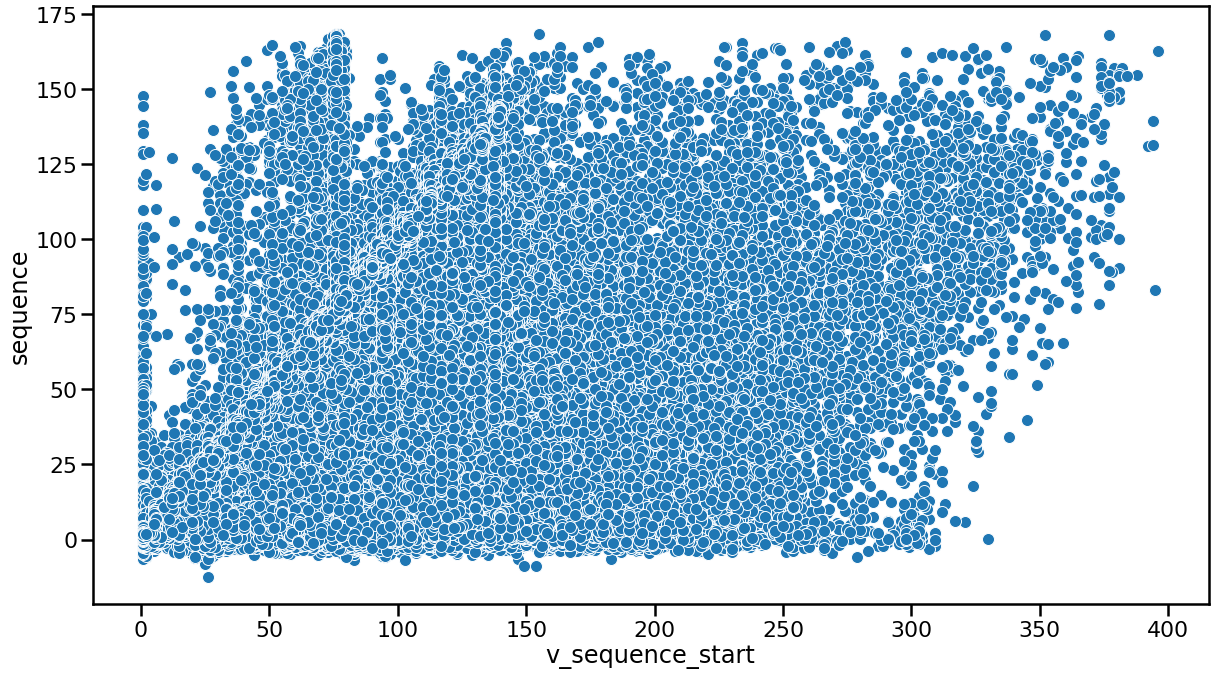

In [38]:
sns.scatterplot(x=igb_predicted['v_sequence_start'],y=predicted['v_start'].flatten()-(512-igb_predicted.sequence.str.len())//2)

<AxesSubplot:xlabel='v_sequence_end', ylabel='sequence'>

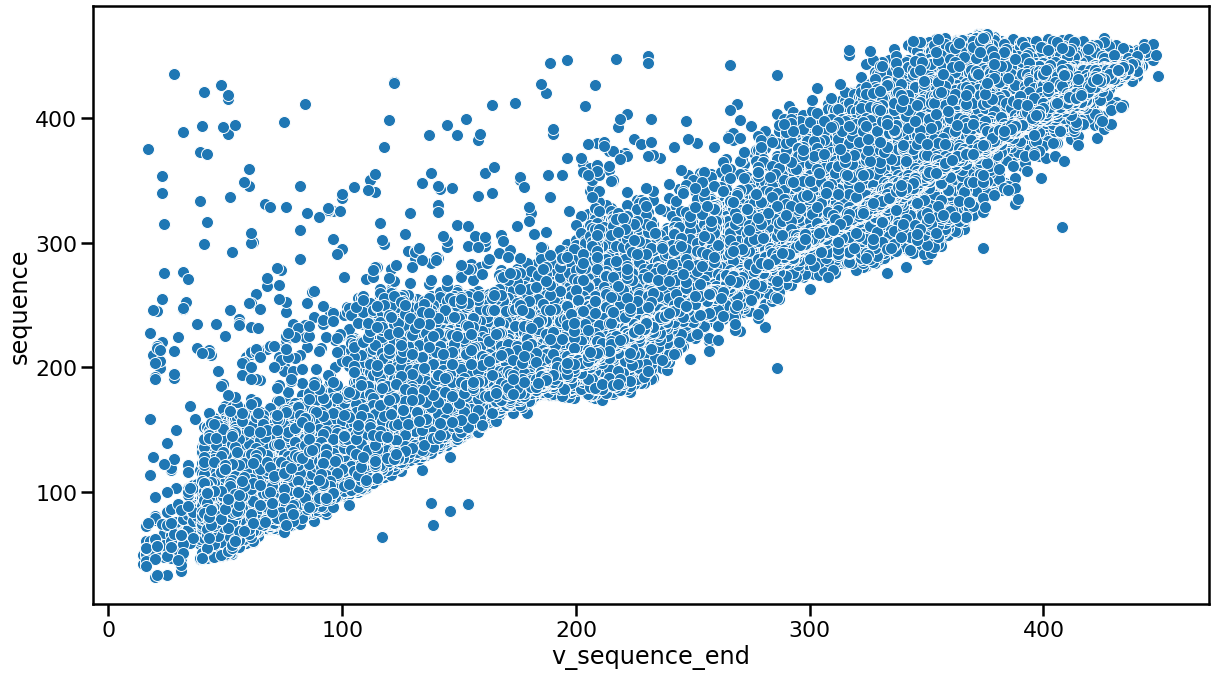

In [39]:
sns.scatterplot(x=igb_predicted['v_sequence_end'],y=predicted['v_end'].flatten()-(512-igb_predicted.sequence.str.len())//2)

In [41]:
from VDeepJUnbondedDataset import global_genotype
locus = global_genotype()
v_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['V']}
d_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['D']}
j_dict = {i.name: i.ungapped_seq.upper() for i in locus[0]['J']}
        
v_alleles = sorted(list(v_dict))
d_alleles = sorted(list(d_dict))
j_alleles = sorted(list(j_dict))

v_allele_count = len(v_alleles)
d_allele_count = len(d_alleles)
j_allele_count = len(j_alleles)

v_allele_call_rev_ohe = {i: f for i, f in enumerate(v_alleles)}
d_allele_call_rev_ohe = {i: f for i, f in enumerate(d_alleles)}
j_allele_call_rev_ohe = {i: f for i, f in enumerate(j_alleles)}

In [45]:
V_argmax = [v_allele_call_rev_ohe[np.argmax(i)] for i in predicted['v_allele']]

In [46]:
V_ratio = []
for v_all in tqdm(predicted['v_allele']):
    v_alleles  = log_threshold(v_all,th=0.4)
    V_ratio.append([v_allele_call_rev_ohe[i] for i in v_alleles])

  0%|          | 0/2759335 [00:00<?, ?it/s]

In [47]:
V_igb = [i.split(',') for i in igb_predicted.v_call]

In [48]:
argmax_hits = [ len(set([i])&set(j)) > 0 for i,j in zip(V_argmax,V_igb)]
print('Argmax Selection Match:',sum(argmax_hits)/len(argmax_hits))

Argmax Selection Match: 0.9397869414188563


In [49]:
ratio04_hits = [ len(set(i)&set(j)) > 0 for i,j in zip(V_ratio,V_igb)]
print('0.4 Log Threshold Selection Match:',sum(ratio04_hits)/len(ratio04_hits))

0.4 Log Threshold Selection Match: 0.9584693413449255


In [ ]:
# (pd.Series(list(map(len,V_ratio))).value_counts()/len(hits)).round(2)
# (pd.Series(list(map(len,V_igb))).value_counts()/len(hits)).round(2)

In [67]:
mismatch = igb_predicted[~np.array(ratio04_hits)].copy()

In [55]:
pd.Series(V_ratio)[~np.array(ratio04_hits)]

81         [IGHVF8-G45*06, IGHVF8-G45*08]
83                        [IGHVF8-G45*05]
108                       [IGHVF8-G45*08]
109                       [IGHVF5-G22*01]
125                       [IGHVF2-G14*08]
                        ...              
2759311                   [IGHVF2-G12*02]
2759315     [IGHVF2-G12*02, IGHVF2-G9*04]
2759317                   [IGHVF2-G14*12]
2759321                   [IGHVF2-G16*03]
2759323                   [IGHVF2-G17*06]
Length: 114597, dtype: object

In [68]:
mismatch.v_call = mismatch.v_call.apply(lambda x: x.split(','))

In [69]:
mismatch

,sequence,v_sequence_start,v_sequence_end,d_sequence_start,d_sequence_end,j_sequence_start,j_sequence_end,v_call,d_call,j_call
154,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,151,244,259.0,267.0,272,332,"[IGHVF8-G45*04, IGHVF8-G45*07]","IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ6*03
158,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,93,389,393.0,405.0,422,462,[IGHVF8-G45*07],IGHD3-10*01,IGHJ4*02
195,GGTATCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,93,391,407.0,416.0,422,465,[IGHVF8-G45*04],IGHD3-22*01,IGHJ4*02
198,ATATAGTAGGAGATATGCAAATAGAGCCCTCCGTCTGCTGATGAAA...,136,218,219.0,240.0,247,295,"[IGHVF2-G18*01, IGHVF2-G18*02, IGHVF2-G18*04]",IGHD3-22*01,IGHJ3*02
224,GTATTACTGTGCGAGAGACACAATGAGGGGAGAGAAGAGGCCATGT...,143,222,234.0,251.0,252,295,"[IGHVF2-G14*01, IGHVF2-G14*02, IGHVF2-G14*20, ...",IGHD3-10*01,IGHJ4*02
...,...,...,...,...,...,...,...,...,...,...
4950883,GAGCTCTGGGAGAGGAGCCCCAGCCGTGAGATTCCCAGGAGTTTCC...,140,433,441.0,445.0,446,485,[IGHVF2-G10*02],"IGHD6-13*01,IGHD6-25*01,IGHD6-6*01",IGHJ4*02
4950889,GAGCTCTGGGAGAGGAGCCCCAGCCTTGGGATTCCCAAGTGTTTTC...,140,432,435.0,440.0,442,487,[IGHVF2-G10*01],"IGHD1-26*01,IGHD7-27*01",IGHJ4*02
4950892,GGCACTGGAAGTCGCCGGTGTTTCCATTCGGTGATCAGCACTGAAC...,119,393,NaN,NaN,409,449,[IGHVF2-G14*13],NaN,IGHJ4*02
4950898,GGAGAGAGGAGCCTTAGCCCTGGATTCCAAGGCCTATCCACTTGGT...,132,426,434.0,441.0,450,487,[IGHVF2-G18*02],"IGHD2-21*02,IGHD6-19*01",IGHJ3*02


<AxesSubplot:ylabel='Count'>

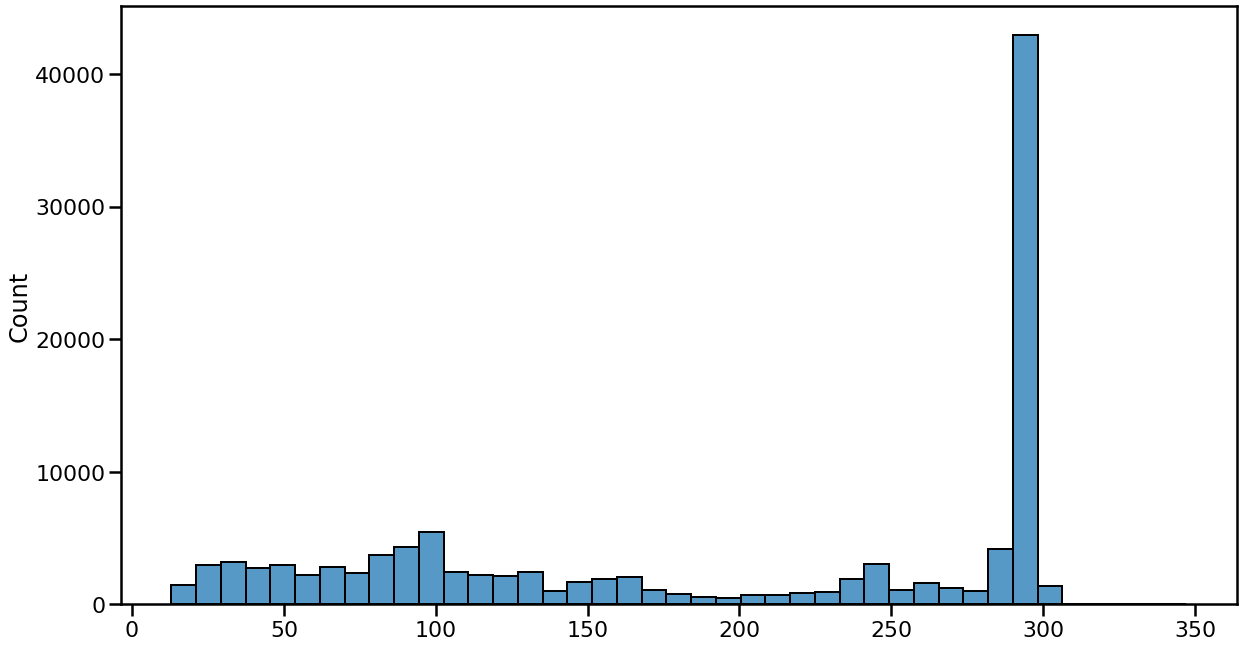

In [51]:
sns.histplot(mismatch['v_sequence_end']-mismatch['v_sequence_start'])

In [41]:
import tensorflow.keras.backend as K
import math
import tensorflow as tf

def interval_iou(interval1, interval2, GIoU=False, DIoU=False, CIoU=False, eps=1e-7):
    # interval1 and interval2 should be 1x2 tensors [start, end]

    # Get the coordinates of intervals
    b1_start, b1_end = interval1[0], interval1[1]
    b2_start, b2_end = interval2[0], interval2[1]

    # Intersection area
    inter = K.maximum(0.0, K.minimum(b1_end, b2_end) - K.maximum(b1_start, b2_start))

    # Union Area
    len1 = b1_end - b1_start + eps
    len2 = b2_end - b2_start + eps
    union = len1 + len2 - inter + eps

    iou = inter / union

    if GIoU or DIoU or CIoU:
        c_len = K.maximum(b1_end, b2_end) - K.minimum(b1_start, b2_start)  # convex (smallest enclosing interval) length
        if CIoU or DIoU:  
            c2 = c_len ** 2 + eps  # convex length squared
            rho2 = ((b2_start + b2_end - b1_start - b1_end) ** 2) / 4  # center distance squared
            if DIoU:
                return iou - rho2 / c2  # DIoU
            elif CIoU:  
                v = (4 / (math.pi ** 2)) * K.square(tf.math.atan(len2 / (len1 + eps)))
                alpha = v / (v - iou + (1 + eps))
                return iou - (rho2 / c2 + v * alpha)  # CIoU
        else:  
            c_area = c_len + eps  # convex area
            return iou - (c_area - union) / c_area  # GIoU
    else:
        return iou  # IoU


In [59]:

x_start = 1
x_end = 190

y_start = 1
y_end = 190

interval_iou(np.array([[float(x_start)],[float(x_end)]]),np.array([[float(y_start)],[float(y_end)]]),CIoU=True)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.7500001])>

In [58]:
0.75--0.22

0.97